In [1]:
import multimodal_cci as mmcci

2024-07-11 15:37:05.686226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 15:37:06.788254: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 15:37:07.356358: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-11 15:37:07.356404: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc

#### Load stLearn data objects

In [2]:
import pickle

with open('MultimodalCCI/data/brain_data.pkl', 'rb') as f:
    brain_data = pickle.load(f)

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Ependymal': plt.colormaps.get_cmap('tab10').colors[0],
    'Astrocytes': plt.colormaps.get_cmap('tab10').colors[1],
    'Vascular': plt.colormaps.get_cmap('tab10').colors[2],
    'Oligos': plt.colormaps.get_cmap('tab10').colors[3],
    'Neurons': plt.colormaps.get_cmap('tab10').colors[4],
    'Microglia': plt.colormaps.get_cmap('tab10').colors[5],
    'Immune': plt.colormaps.get_cmap('tab10').colors[6],
    'PeripheralGlia': plt.colormaps.get_cmap('tab10').colors[7],
}

#### Normalise each group of samples

In [4]:
brain_aged_tech1_normalised = mmcci.it.normalise_within_tech(brain_data['brain_aged_tech1_cci'], brain_data['brain_aged_tech1_sizes'])
brain_young_tech1_normalised = mmcci.it.normalise_within_tech(brain_data['brain_young_tech1_cci'], brain_data['brain_young_tech1_sizes'])
brain_aged_tech2_normalised = mmcci.it.normalise_within_tech(brain_data['brain_aged_tech2_cci'], brain_data['brain_aged_tech2_sizes'])
brain_young_tech2_normalised = mmcci.it.normalise_within_tech(brain_data['brain_young_tech2_cci'], brain_data['brain_young_tech2_sizes'])

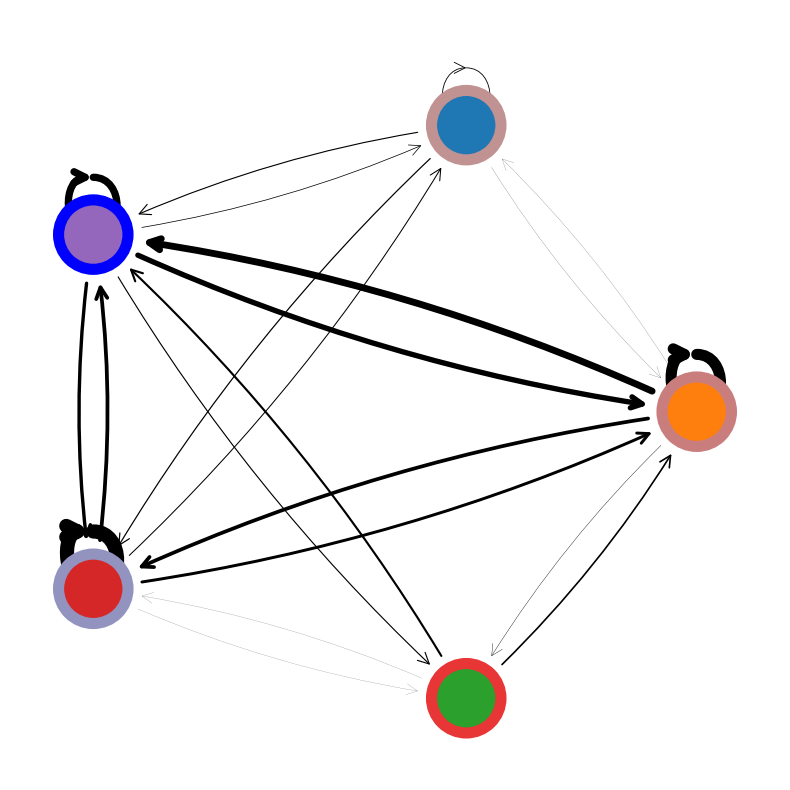

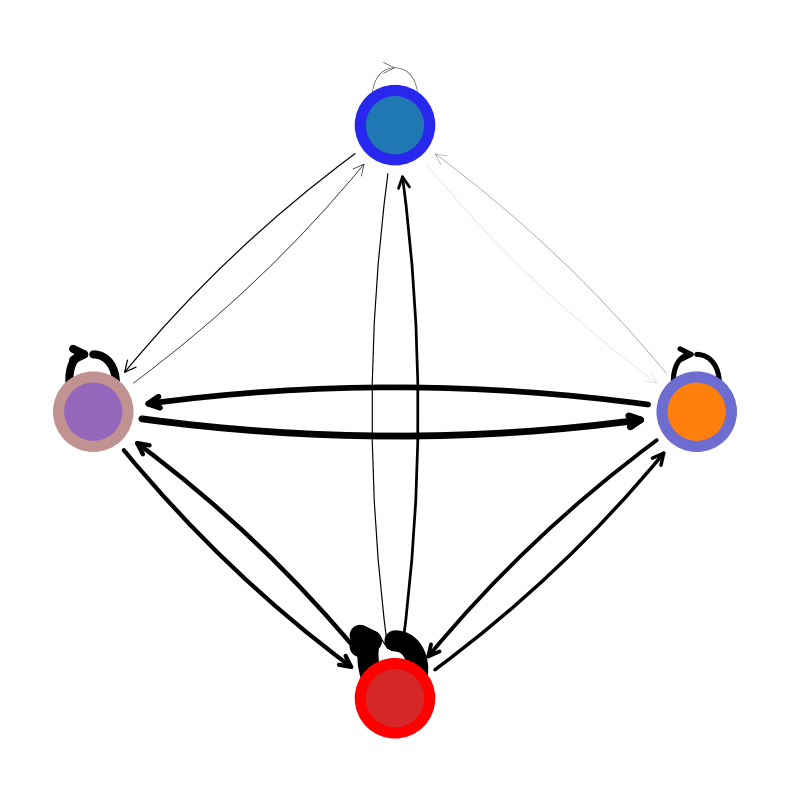

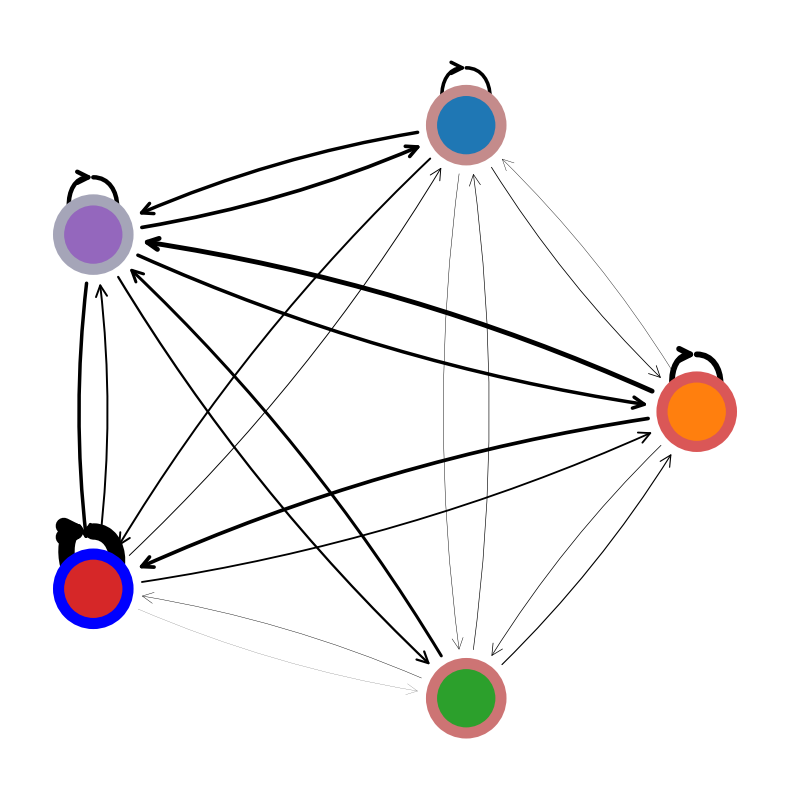

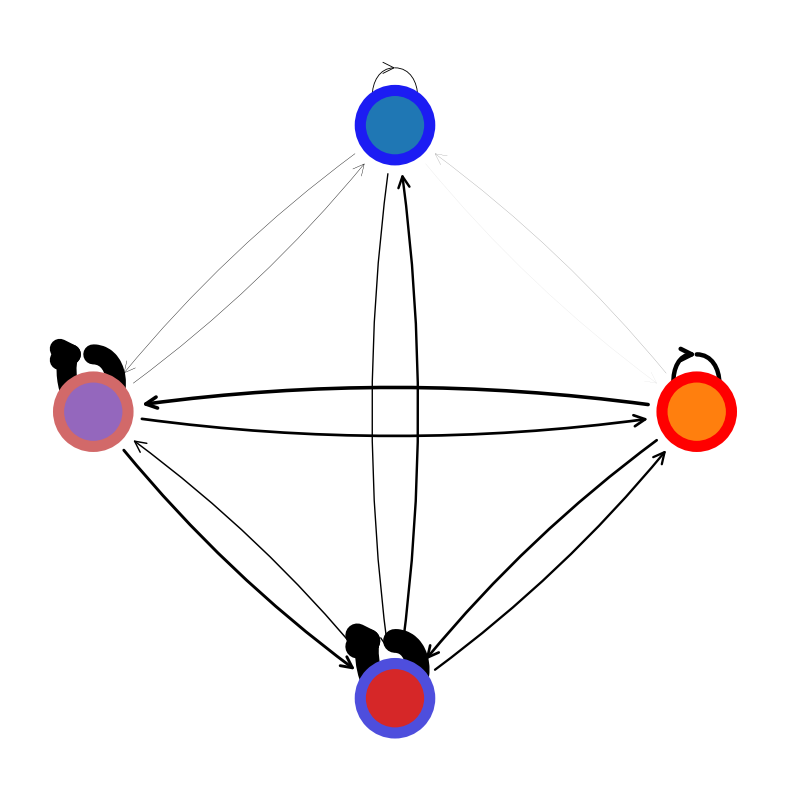

In [5]:
for sample, pvals in zip(brain_aged_tech1_normalised, brain_data['brain_aged_tech1_pvals']):
    sample_filtered = mmcci.it.remove_insignificant(sample, pvals)
    overall_sample = mmcci.it.calculate_overall_interactions(sample_filtered)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

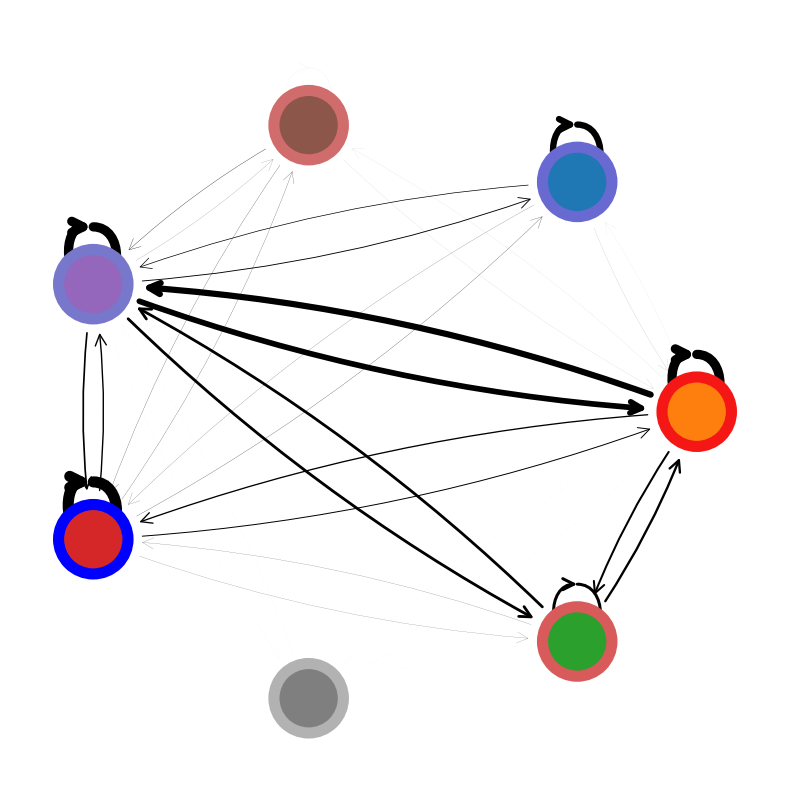

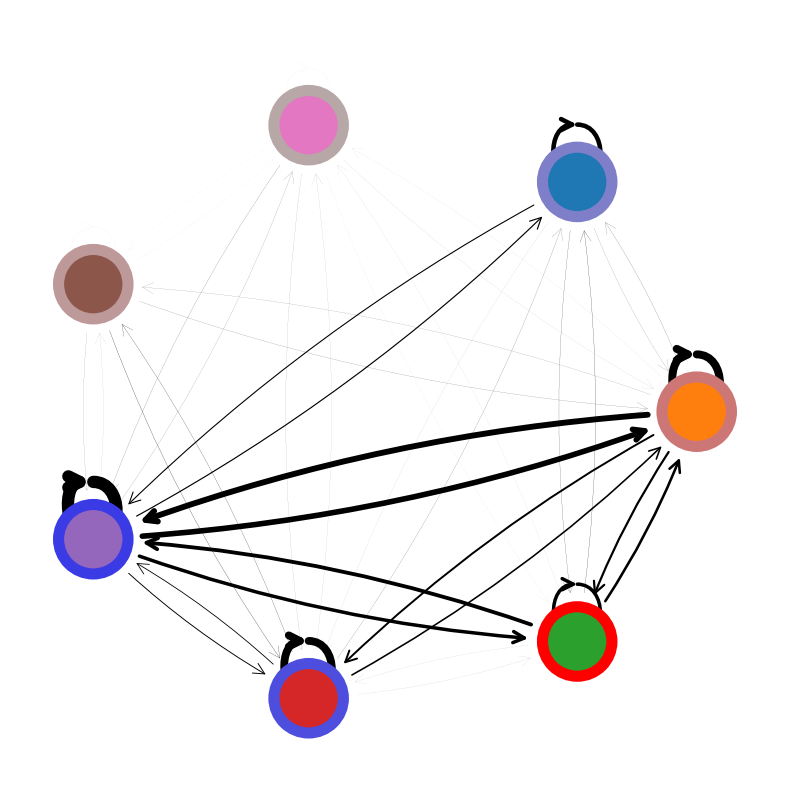

In [6]:
for sample, pvals in zip(brain_aged_tech2_normalised, brain_data['brain_aged_tech2_pvals']):
    sample_filtered = mmcci.it.remove_insignificant(sample, pvals)
    overall_sample = mmcci.it.calculate_overall_interactions(sample_filtered)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

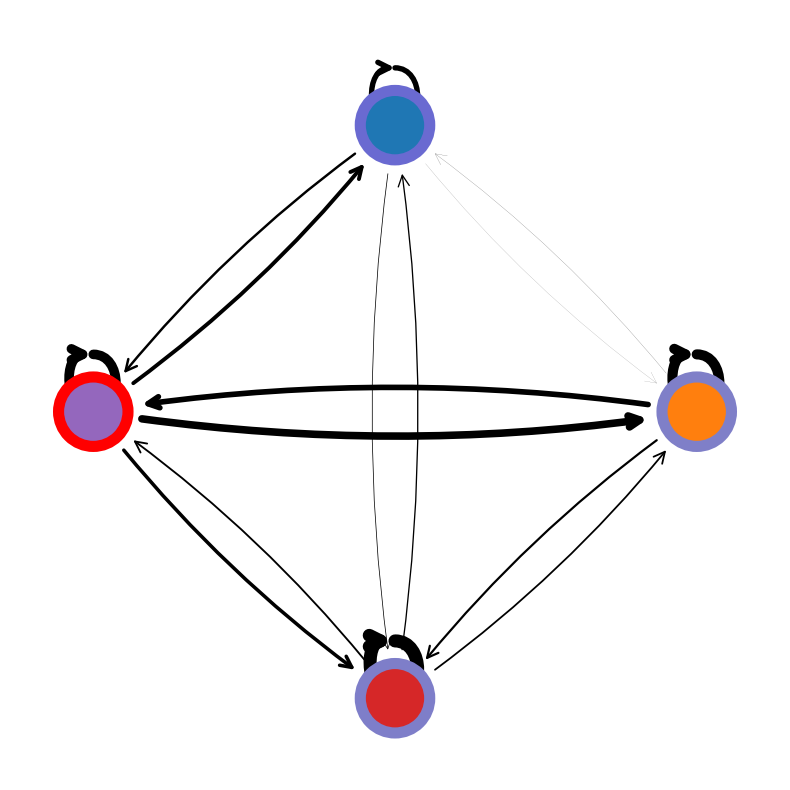

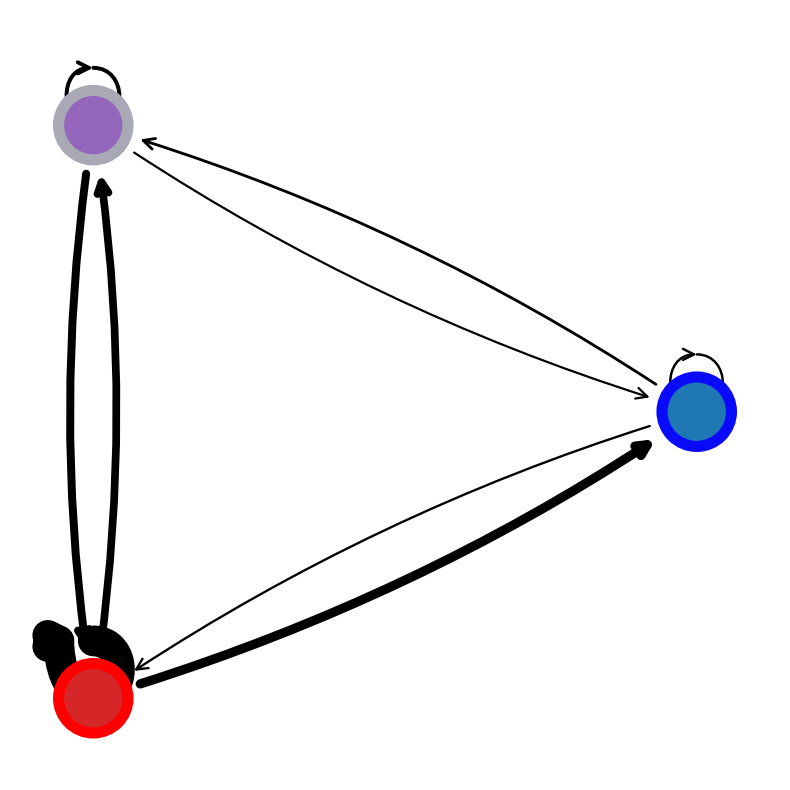

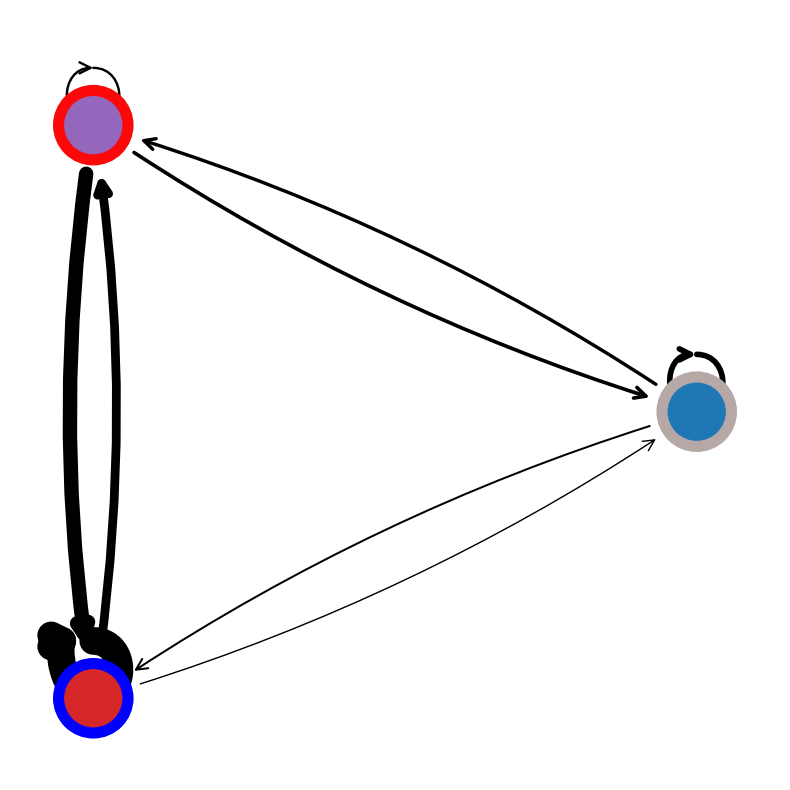

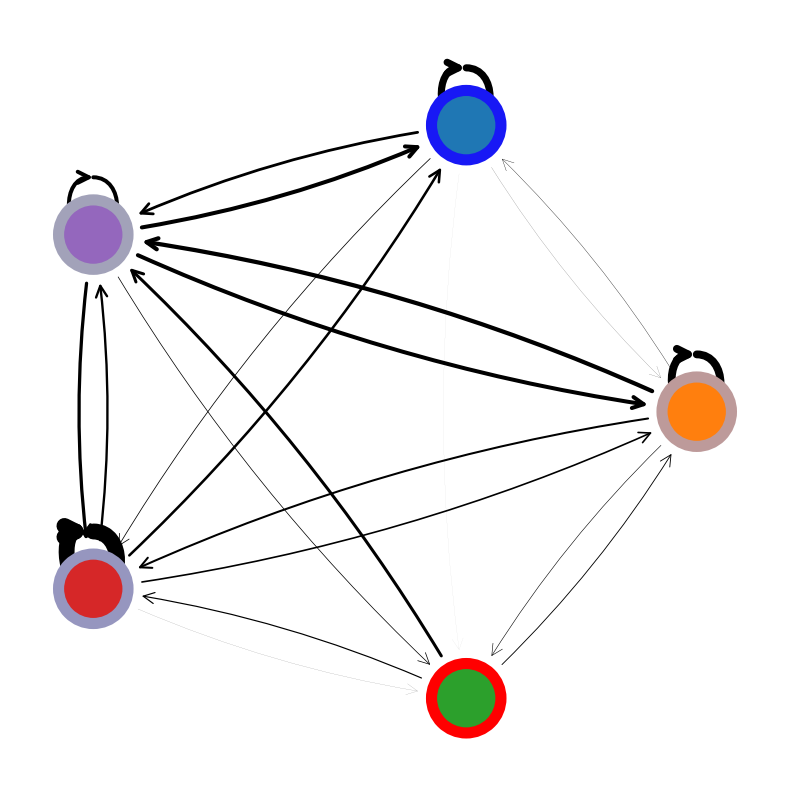

In [7]:
for sample, pvals in zip(brain_young_tech1_normalised, brain_data['brain_young_tech1_pvals']):
    sample_filtered = mmcci.it.remove_insignificant(sample, pvals)
    overall_sample = mmcci.it.calculate_overall_interactions(sample_filtered)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

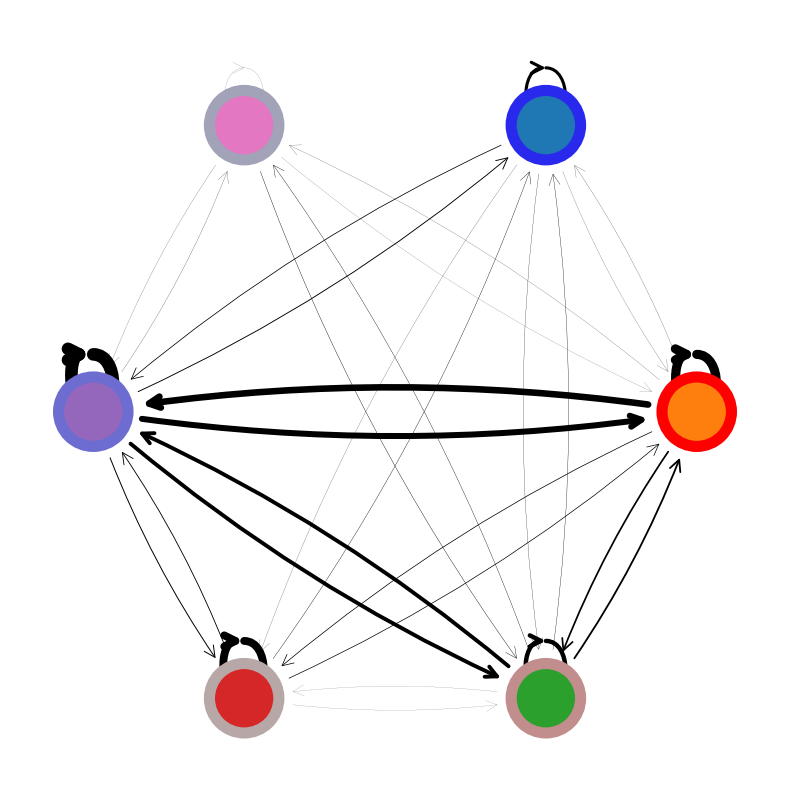

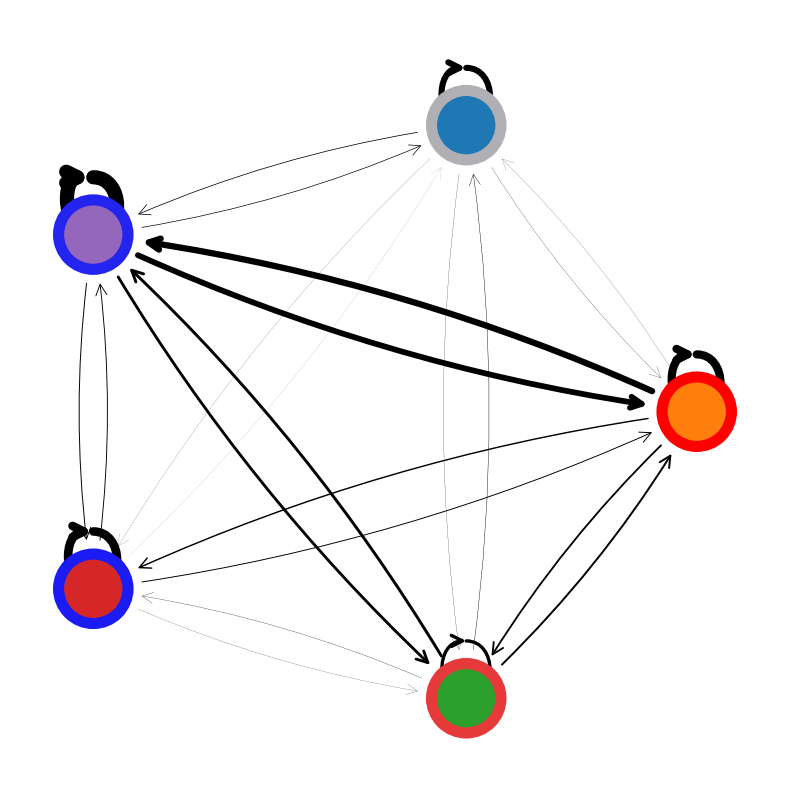

In [8]:
for sample, pvals in zip(brain_young_tech2_normalised, brain_data['brain_young_tech2_pvals']):
    sample_filtered = mmcci.it.remove_insignificant(sample, pvals)
    overall_sample = mmcci.it.calculate_overall_interactions(sample_filtered)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Integrate within technologies

In [9]:
brain_aged_tech1_integrated = mmcci.it.integrate_samples(brain_aged_tech1_normalised, method=">=50%", strict=True)
brain_young_tech1_integrated = mmcci.it.integrate_samples(brain_young_tech1_normalised, method=">=50%", strict=True)
brain_aged_tech2_integrated = mmcci.it.integrate_samples(brain_aged_tech2_normalised, method=">=50%", strict=True)
brain_young_tech2_integrated = mmcci.it.integrate_samples(brain_young_tech2_normalised, method=">=50%", strict=True)

Integrating LR matrices: 100%|██████████| 1253/1253 [00:00<00:00, 1505.48it/s]


In [10]:
brain_aged_tech1_pvals = mmcci.it.integrate_p_vals(brain_data['brain_aged_tech1_pvals'])
brain_young_tech1_pvals = mmcci.it.integrate_p_vals(brain_data['brain_young_tech1_pvals'])
brain_aged_tech2_pvals = mmcci.it.integrate_p_vals(brain_data['brain_aged_tech2_pvals'])
brain_young_tech2_pvals = mmcci.it.integrate_p_vals(brain_data['brain_young_tech2_pvals'])

Integrating p values: 100%|██████████| 1253/1253 [00:18<00:00, 67.49it/s]


In [11]:
brain_aged_tech1_integrated_filtered = mmcci.it.remove_insignificant(brain_aged_tech1_integrated, brain_aged_tech1_pvals)
brain_young_tech1_integrated_filtered = mmcci.it.remove_insignificant(brain_young_tech1_integrated, brain_young_tech1_pvals)
brain_aged_tech2_integrated_filtered = mmcci.it.remove_insignificant(brain_aged_tech2_integrated, brain_aged_tech2_pvals)
brain_young_tech2_integrated_filtered = mmcci.it.remove_insignificant(brain_young_tech2_integrated, brain_young_tech2_pvals)

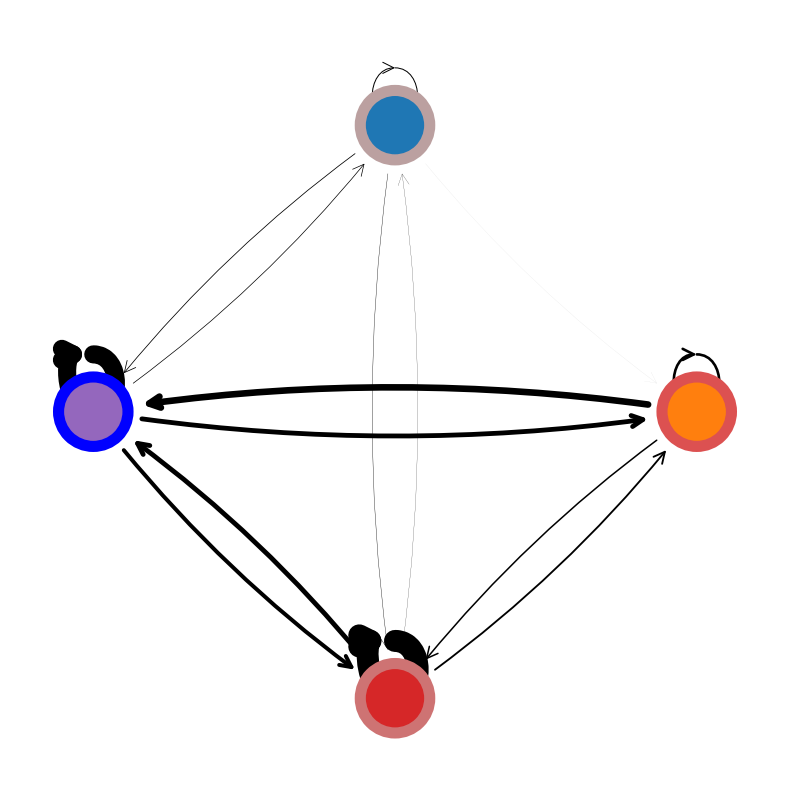

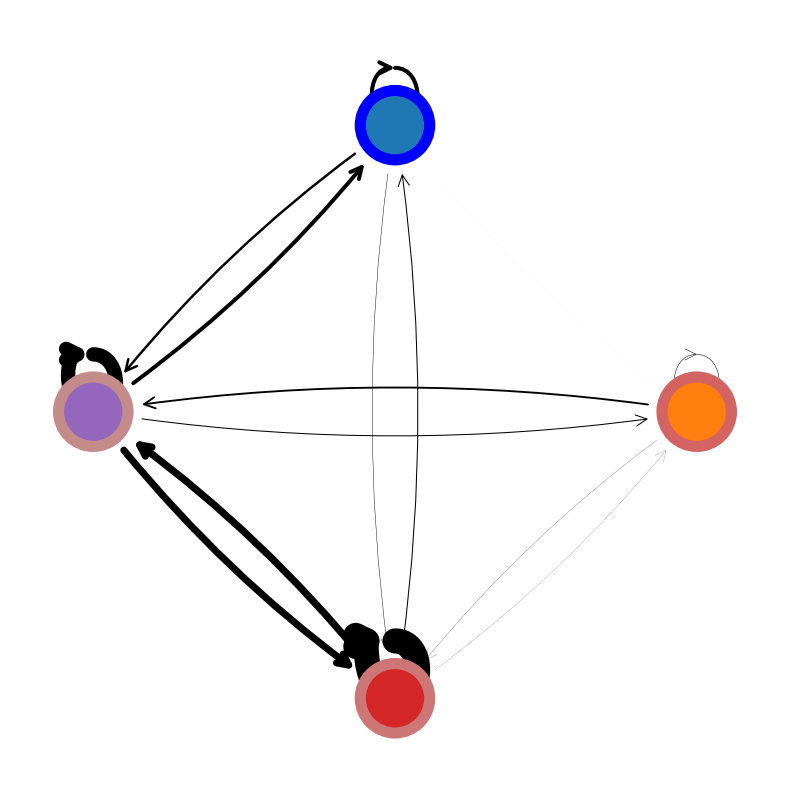

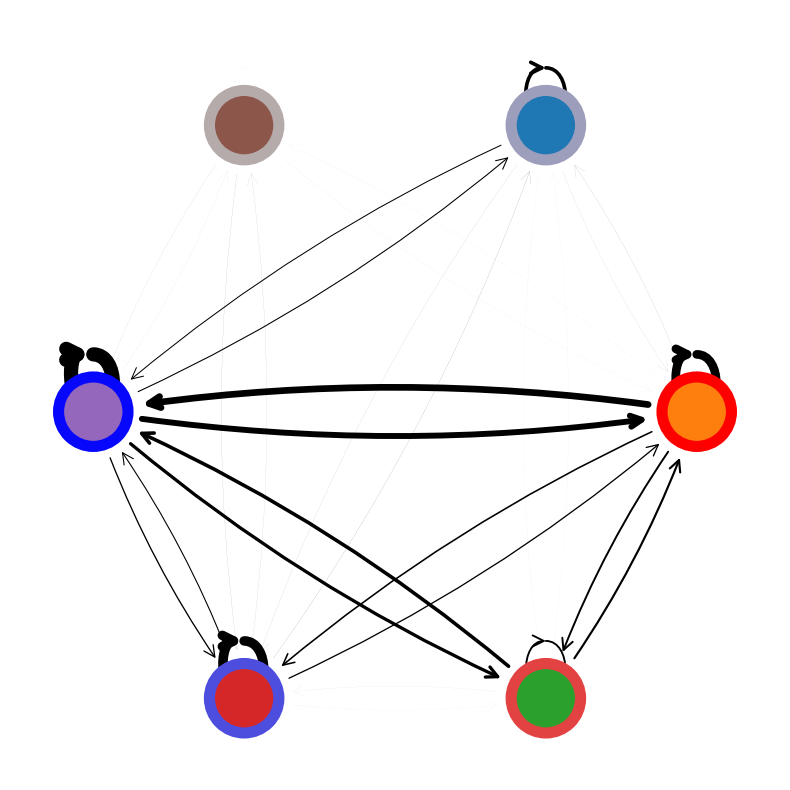

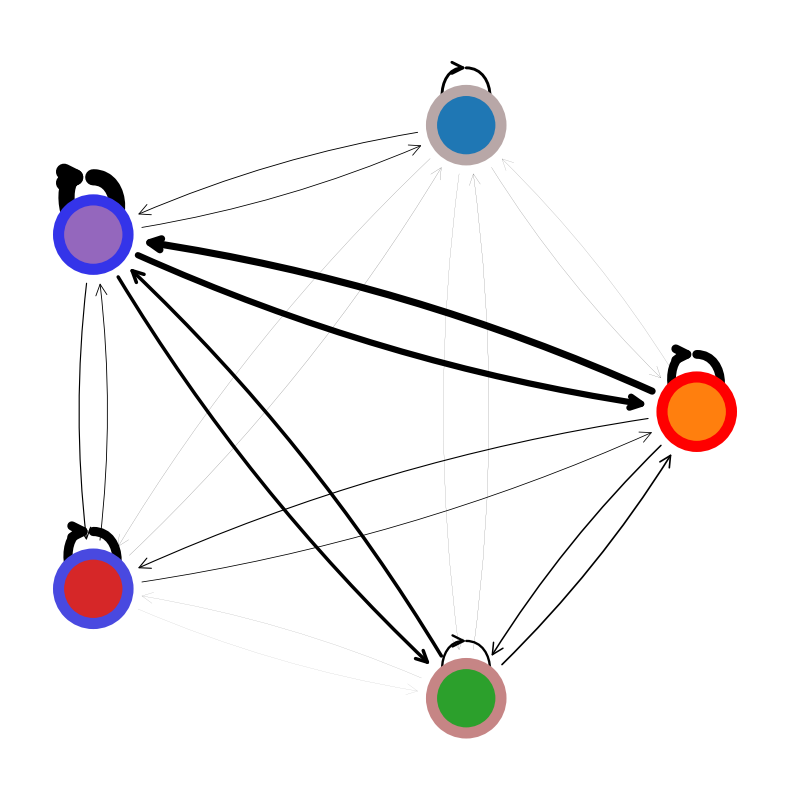

In [12]:
overall_sample = mmcci.it.calculate_overall_interactions(brain_aged_tech1_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
overall_sample = mmcci.it.calculate_overall_interactions(brain_young_tech1_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
overall_sample = mmcci.it.calculate_overall_interactions(brain_aged_tech2_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
overall_sample = mmcci.it.calculate_overall_interactions(brain_young_tech2_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Normalise samples between technologies

In [13]:
aged_normalised = mmcci.it.normalise_between_tech([brain_aged_tech1_integrated, brain_aged_tech2_integrated])
young_normalised = mmcci.it.normalise_between_tech([brain_young_tech1_integrated, brain_young_tech2_integrated])

#### Integrate between technologies for both groups

In [14]:
aged_integrated = mmcci.it.integrate_samples(aged_normalised, method=">50%", strict=True)
young_integrated = mmcci.it.integrate_samples(young_normalised, method=">50%", strict=True)

Integrating LR matrices: 100%|██████████| 718/718 [00:00<00:00, 883.41it/s] 


In [15]:
aged_pvals = mmcci.it.integrate_p_vals(brain_data['brain_aged_tech1_pvals'] + brain_data['brain_aged_tech2_pvals'])
young_pvals = mmcci.it.integrate_p_vals(brain_data['brain_young_tech1_pvals'] + brain_data['brain_young_tech2_pvals'])

Integrating p values: 100%|██████████| 1294/1294 [00:21<00:00, 60.79it/s]


In [16]:
aged_pvals = mmcci.it.integrate_p_vals([brain_aged_tech1_pvals, brain_aged_tech2_pvals])
young_pvals = mmcci.it.integrate_p_vals([brain_young_tech1_pvals, brain_young_tech2_pvals])

Integrating p values: 100%|██████████| 1294/1294 [00:17<00:00, 73.43it/s]


In [17]:
aged_integrated_filtered = mmcci.it.remove_insignificant(aged_integrated, aged_pvals)
young_integrated_filtered = mmcci.it.remove_insignificant(young_integrated, young_pvals)

#### Calculate overall interactions network per group

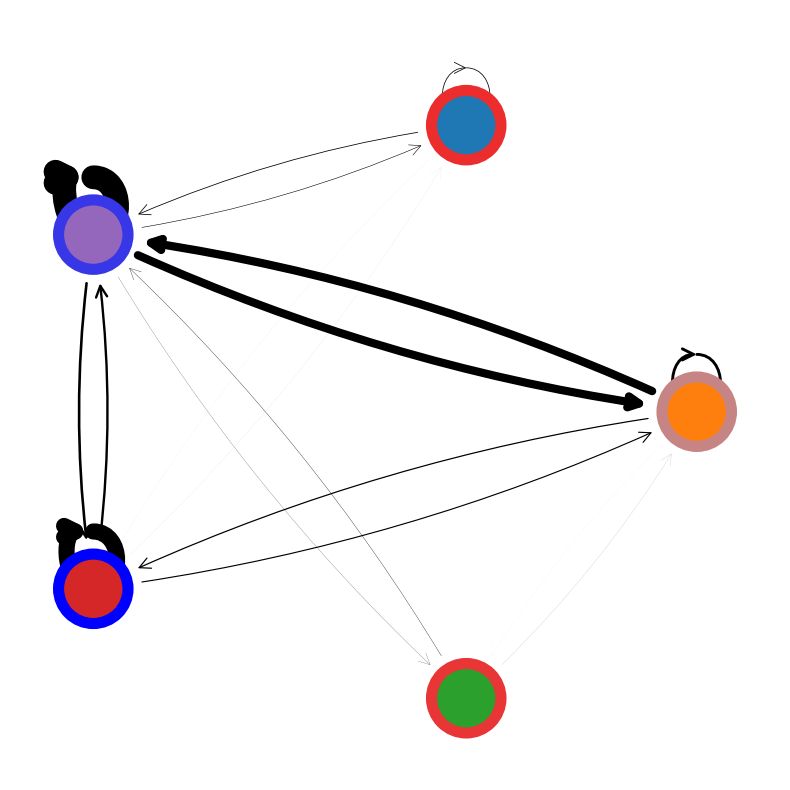

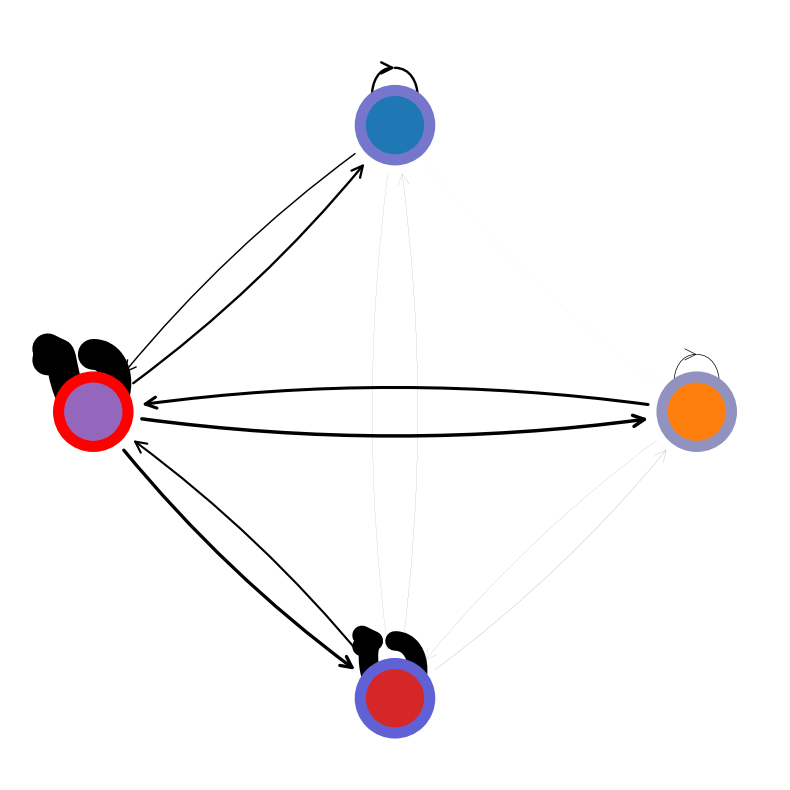

In [18]:
aged_overall = mmcci.it.calculate_overall_interactions(aged_integrated_filtered)
young_overall = mmcci.it.calculate_overall_interactions(young_integrated_filtered)

mmcci.plt.network_plot(aged_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
mmcci.plt.network_plot(young_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Rank LR pairs based on dissimilarity between groups

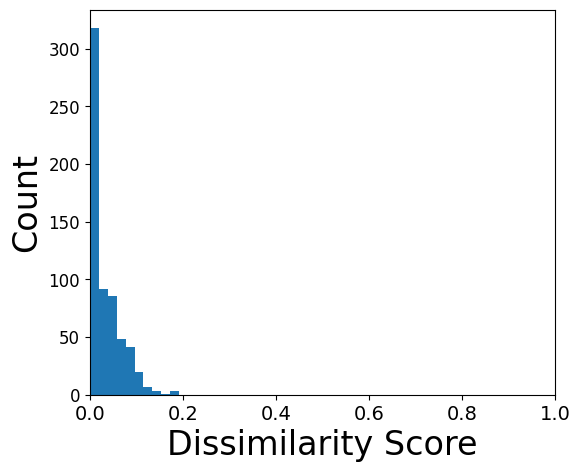

Overall Network Aged vs Young Dissimilarity Score is: 0.23150691648576704


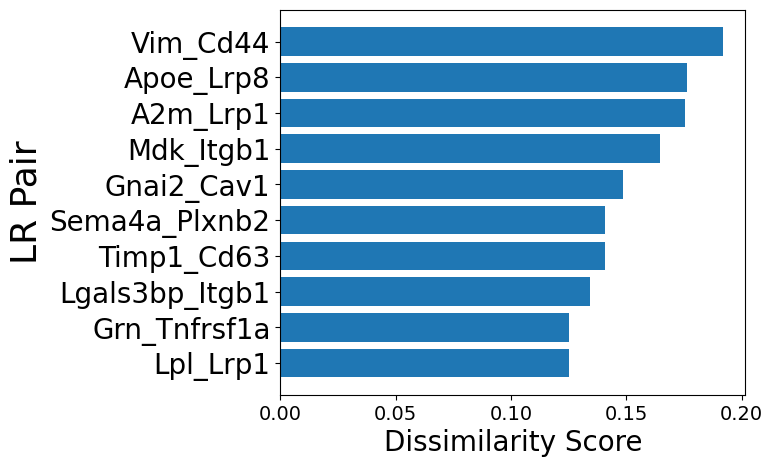

In [19]:
dissimilarity_scores = mmcci.an.calculate_dissim(aged_integrated_filtered, young_integrated_filtered)
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(aged_overall, young_overall)))

mmcci.plt.lr_top_dissimilarity(dissimilarity_scores, x_label_size=20, y_label_size=26, y_tick_size=20, figsize=(6,5))

#### Plot highly dissimilar pairs between groups

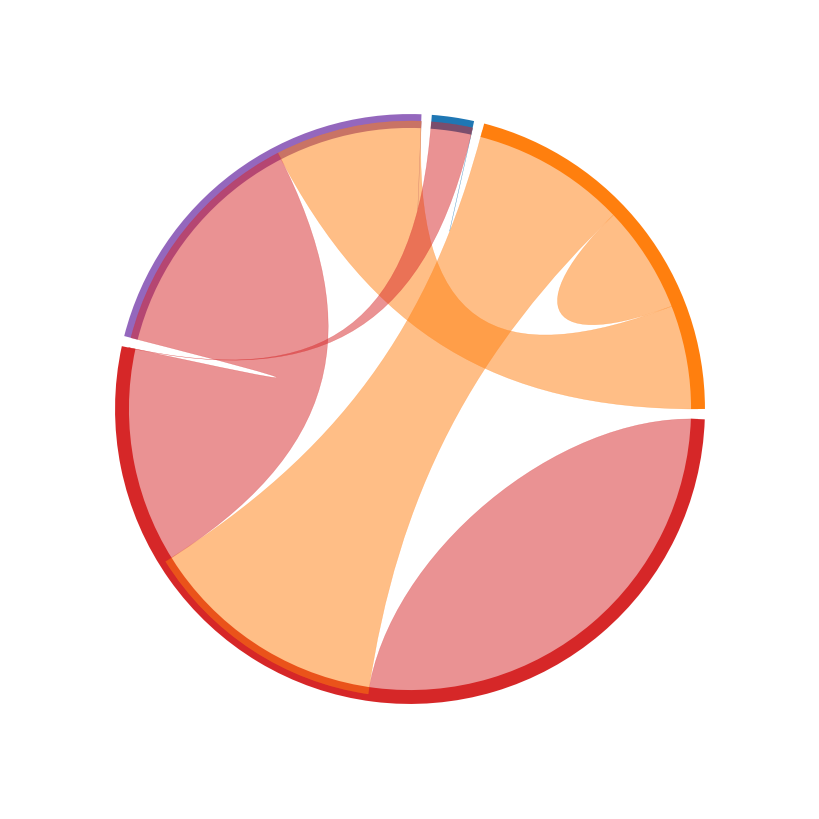

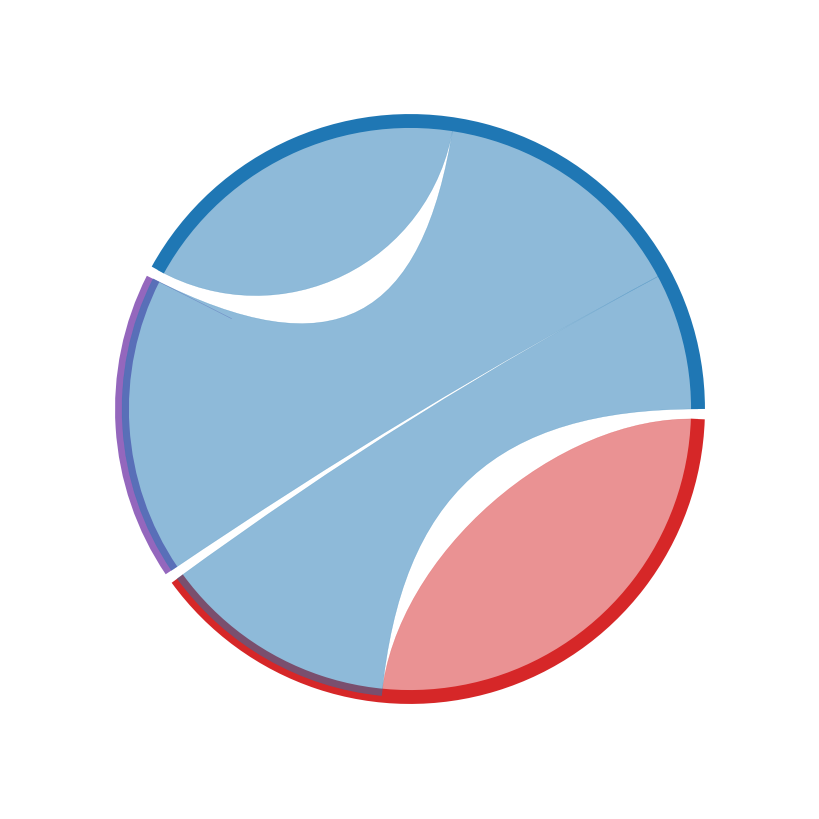

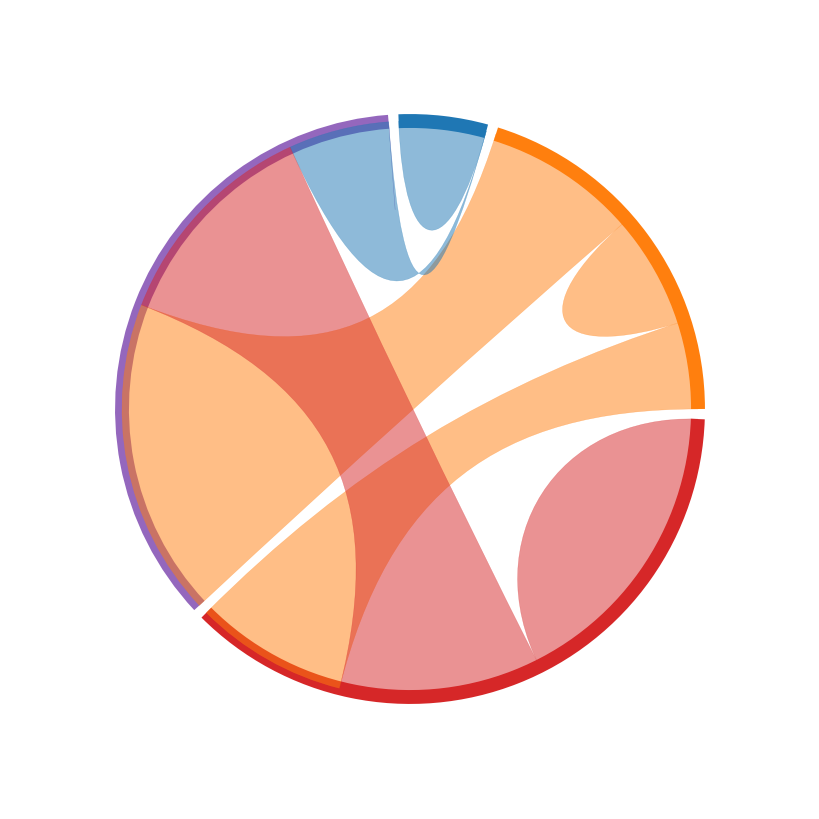

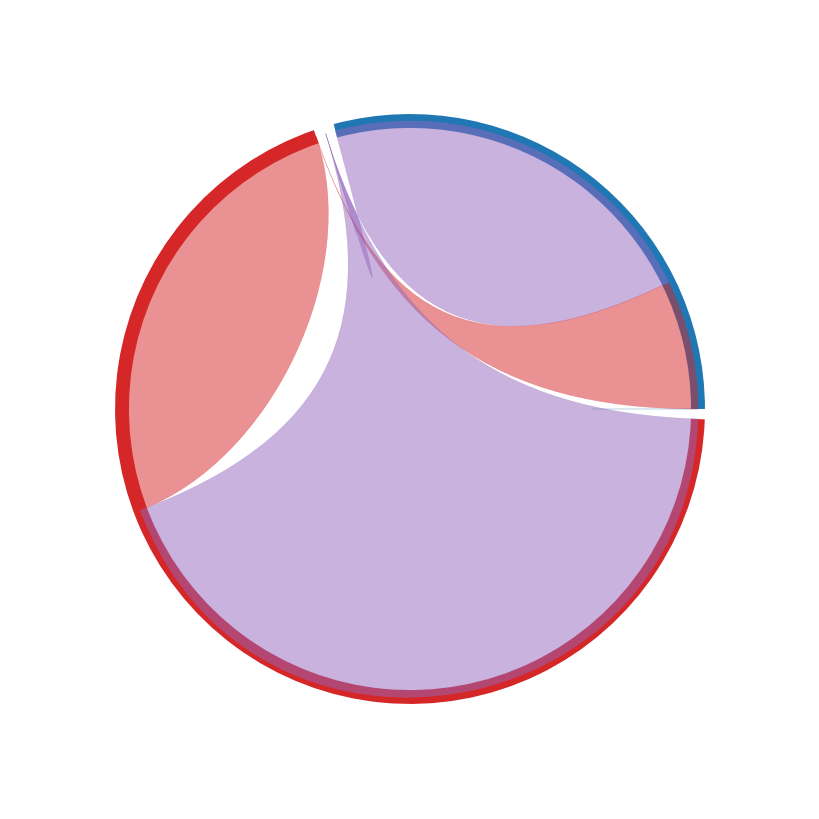

In [20]:
mmcci.plt.chord_plot(aged_integrated_filtered['Vim_Cd44'], colors=colors, label_size=0)
mmcci.plt.chord_plot(young_integrated_filtered['Vim_Cd44'], colors=colors, label_size=0)

mmcci.plt.chord_plot(aged_integrated_filtered['A2m_Lrp1'], colors=colors, label_size=0)
mmcci.plt.chord_plot(young_integrated_filtered['A2m_Lrp1'], colors=colors, label_size=0)

#### Calculate p values for significance changes between groups

In [21]:
p_values = mmcci.an.perm_test(aged_overall, young_overall)
p_values

Astrocytes  Ependymal   Immune  Microglia  Neurons   Oligos  \
Astrocytes         0.06302    0.29937  0.29570    0.29646  0.01573  0.11053   
Ependymal          0.27885    0.09270  0.29554    0.29762  0.15600  0.23437   
Immune             0.29371    0.29814  0.29611    0.29712  0.29612  0.29617   
Microglia          0.29538    0.29738  0.29533    0.29663  0.29806  0.29898   
Neurons            0.03042    0.07869  0.29945    0.29682  0.00000  0.13877   
Oligos             0.12512    0.24931  0.29422    0.29855  0.18694  0.04712   
PeripheralGlia     0.29642    0.29451  0.29849    0.29855  0.29700  0.29687   
Vascular           0.21796    0.29608  0.29665    0.29924  0.17072  0.29747   

                PeripheralGlia  Vascular  
Astrocytes             0.29707   0.26623  
Ependymal              0.29667   0.29965  
Immune                 0.29793   0.29897  
Microglia              0.29579   0.29780  
Neurons                0.29804   0.20216  
Oligos                 0.29773   0.29641  
PeripheralGlia         0.29791   0.29723  
Vascular               0.29561   0.29600

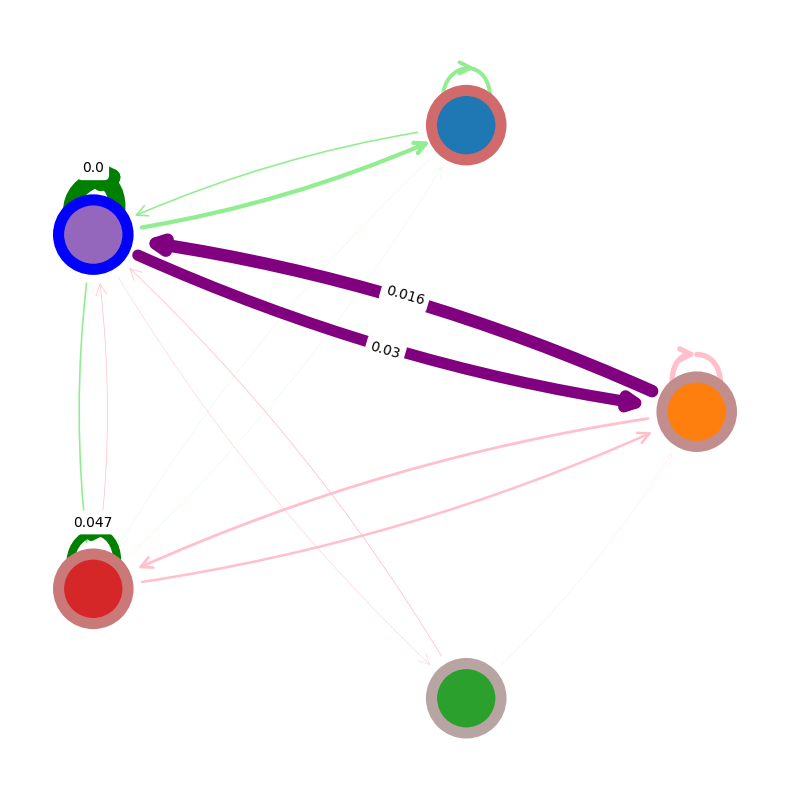

In [22]:
age_diff = mmcci.an.get_network_diff(aged_overall, young_overall)
mmcci.plt.network_plot(age_diff, p_values, diff_plot=True, show_labels=False, node_size=2500, edge_weight=120, figsize=(8,8), node_colors=colors)

In [23]:
aged_overall

Astrocytes  Ependymal  Immune  Microglia   Neurons    Oligos  \
Astrocytes        0.041763   0.000000     0.0        0.0  0.118802  0.017534   
Ependymal         0.000040   0.011118     0.0        0.0  0.011254  0.000235   
Immune            0.000000   0.000000     0.0        0.0  0.000000  0.000000   
Microglia         0.000000   0.000000     0.0        0.0  0.000000  0.000000   
Neurons           0.117923   0.008000     0.0        0.0  0.343115  0.037656   
Oligos            0.016462   0.000409     0.0        0.0  0.034351  0.232926   
PeripheralGlia    0.000000   0.000000     0.0        0.0  0.000000  0.000000   
Vascular          0.001005   0.000000     0.0        0.0  0.004671  0.000000   

                PeripheralGlia  Vascular  
Astrocytes                 0.0  0.000168  
Ependymal                  0.0  0.000000  
Immune                     0.0  0.000000  
Microglia                  0.0  0.000000  
Neurons                    0.0  0.002565  
Oligos                     0.0  0.000000  
PeripheralGlia             0.0  0.000000  
Vascular                   0.0  0.000000

In [24]:
young_overall

Astrocytes  Ependymal  Immune   Neurons    Oligos  Vascular
Astrocytes    0.010097   0.000000     0.0  0.043614  0.001039       0.0
Ependymal     0.000130   0.034664     0.0  0.020853  0.000964       0.0
Immune        0.000000   0.000000     0.0  0.000000  0.000000       0.0
Neurons       0.050013   0.033483     0.0  0.443677  0.047362       0.0
Oligos        0.001493   0.001126     0.0  0.030010  0.281475       0.0
Vascular      0.000000   0.000000     0.0  0.000000  0.000000       0.0

#### Get LR pairs from Astrocytes to Neurons

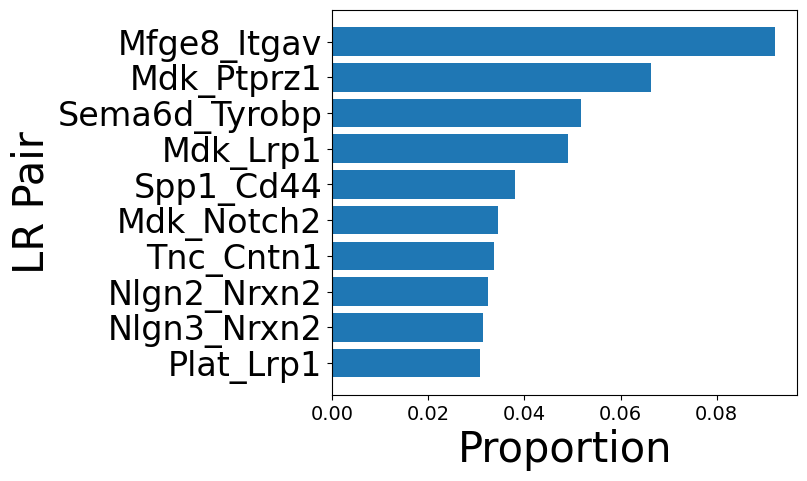

In [25]:
mmcci.plt.lrs_per_celltype(young_integrated_filtered, "Astrocytes", "Neurons", n=10, x_label_size=30, y_label_size=30, y_tick_size=24, figsize=(6,5))

In [26]:
len(mmcci.an.get_lrs_per_celltype(young_integrated_filtered, "Astrocytes", "Neurons"))

42

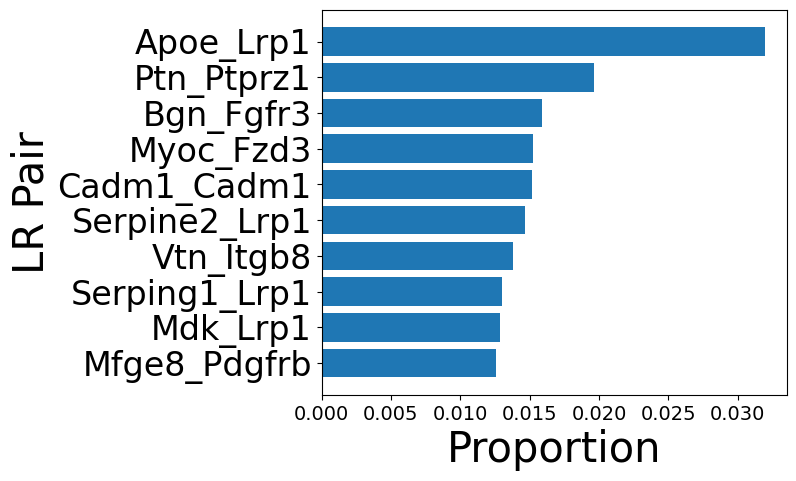

In [27]:
mmcci.plt.lrs_per_celltype(aged_integrated_filtered, "Astrocytes", "Neurons", n=10, x_label_size=30, y_label_size=30, y_tick_size=24, figsize=(6,5))

In [28]:
len(mmcci.an.get_lrs_per_celltype(aged_integrated_filtered, "Astrocytes", "Neurons"))

201

#### Cluster Aged and Young LR Pairs

In [29]:
aged_clusters = mmcci.an.lr_grouping(aged_integrated_filtered, n_clusters=0)
aged_integrated_clusters = mmcci.an.subset_clusters(aged_integrated_filtered, aged_clusters)
aged_overall_clusters = mmcci.an.calculate_cluster_interactions(aged_integrated_clusters)

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 374/374 [00:43<00:00,  8.56it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 254/254 [00:22<00:00, 11.47it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...



cluster0: Contains 32 LR pairs


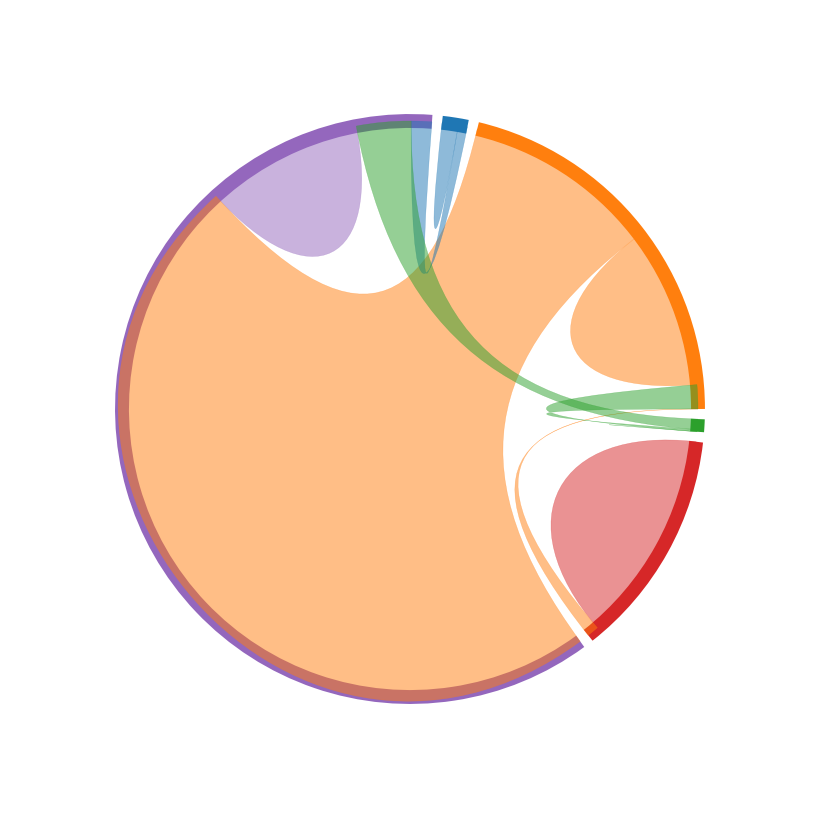


cluster1: Contains 38 LR pairs


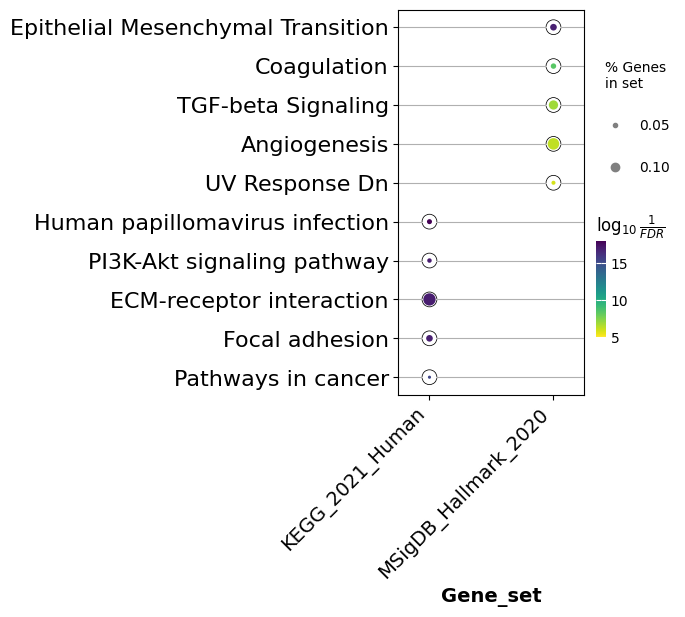

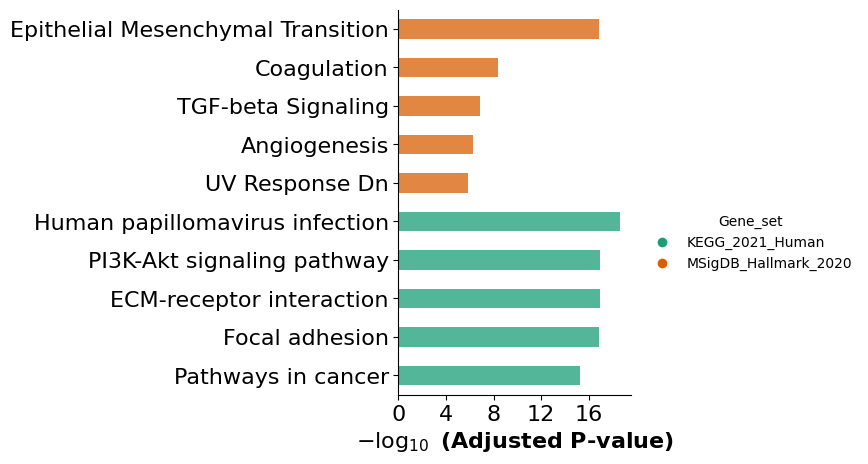

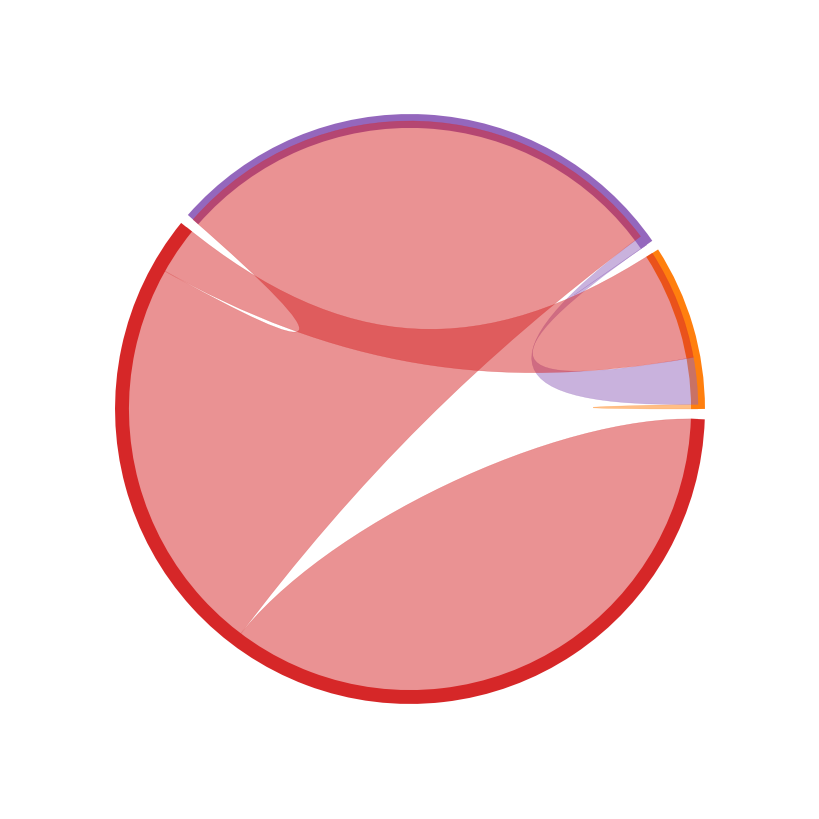


cluster2: Contains 26 LR pairs


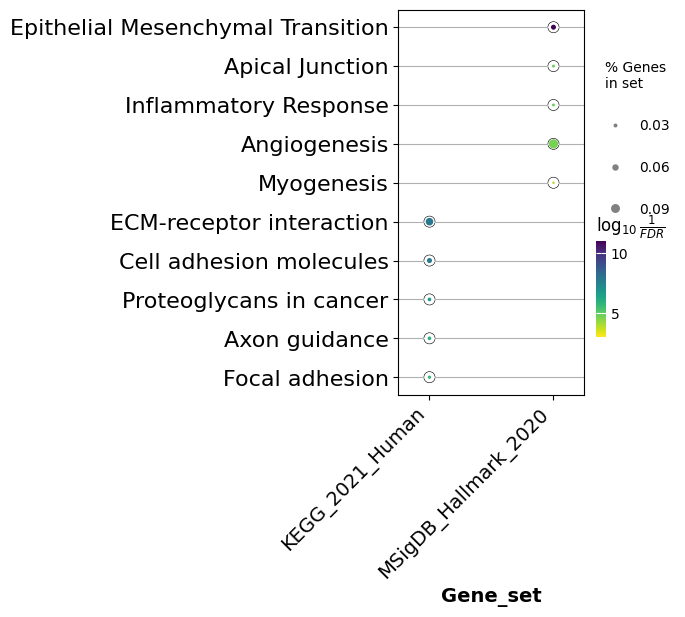

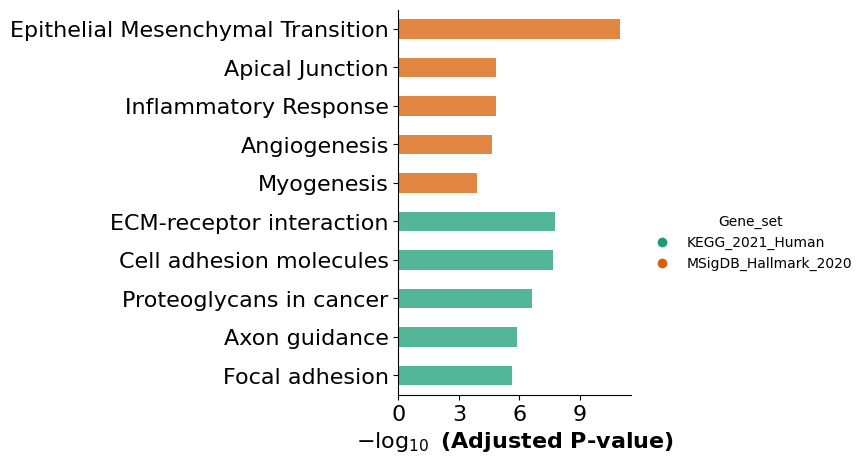

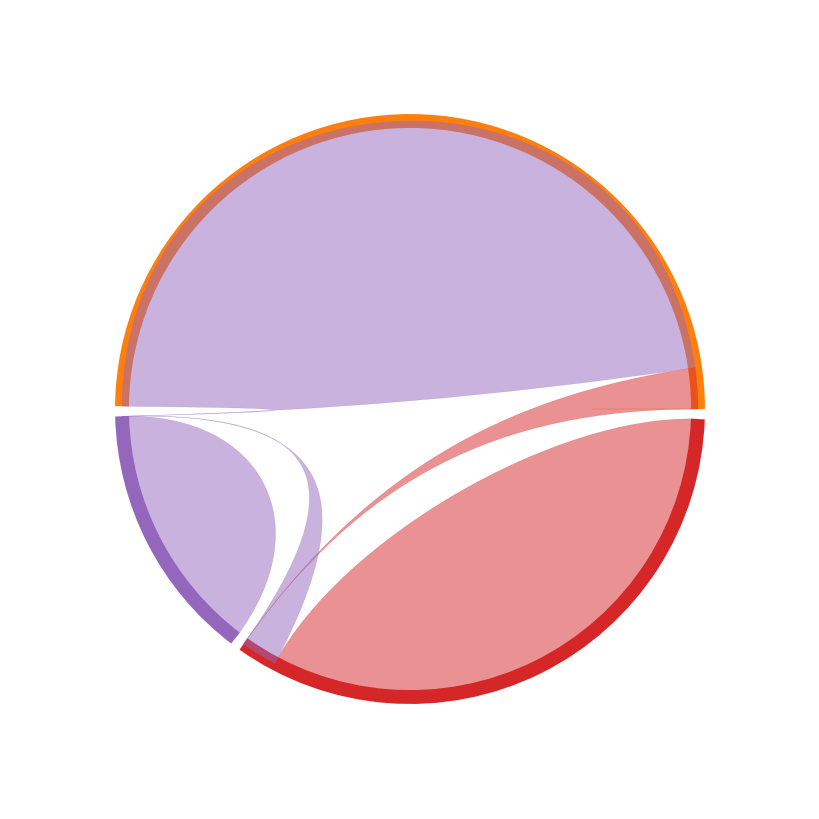


cluster3: Contains 50 LR pairs


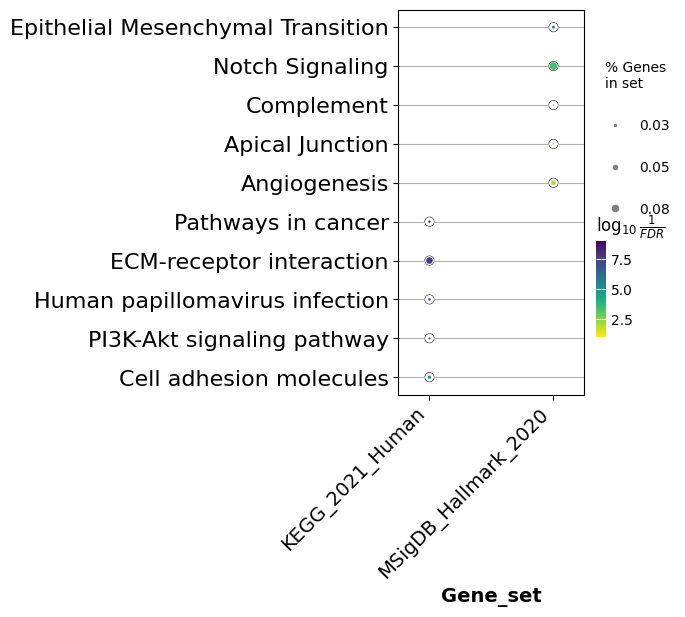

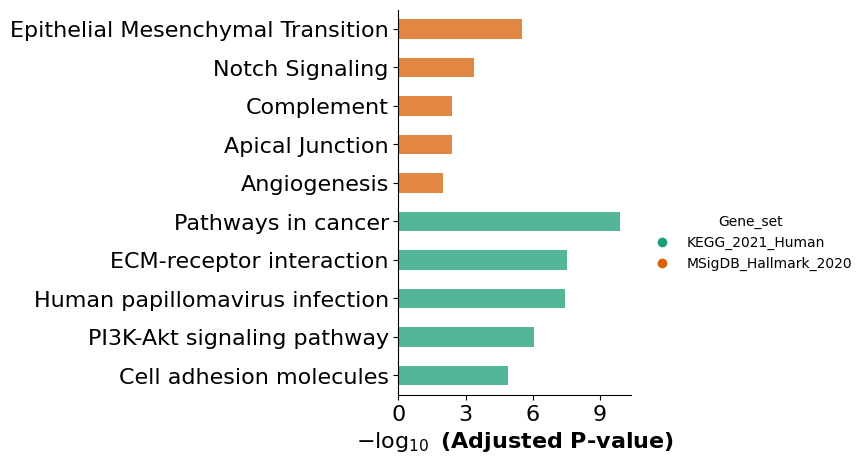

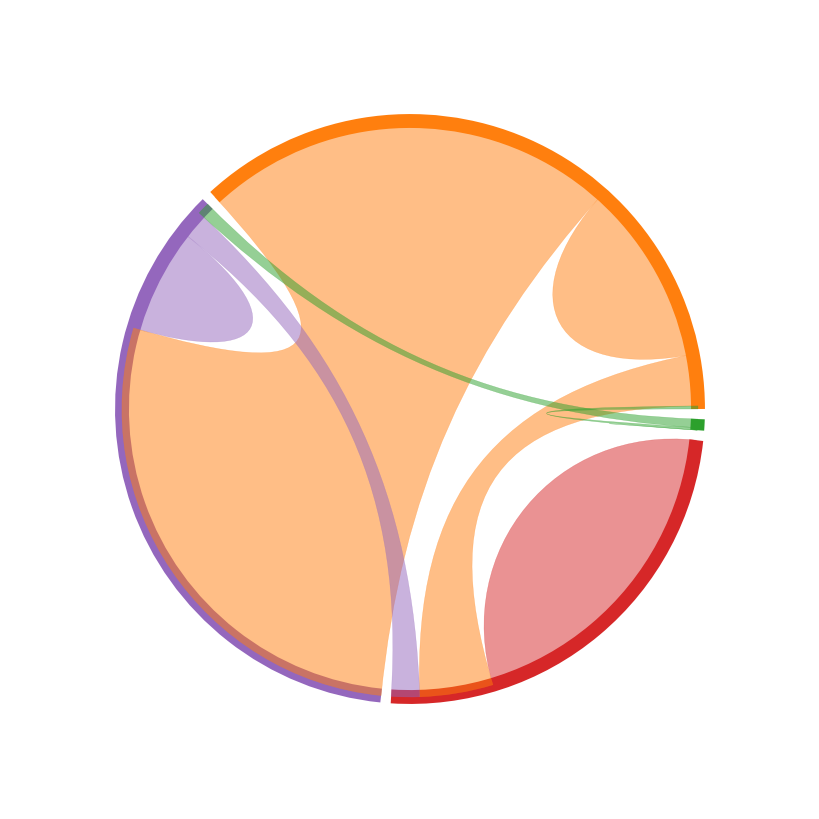


cluster4: Contains 28 LR pairs


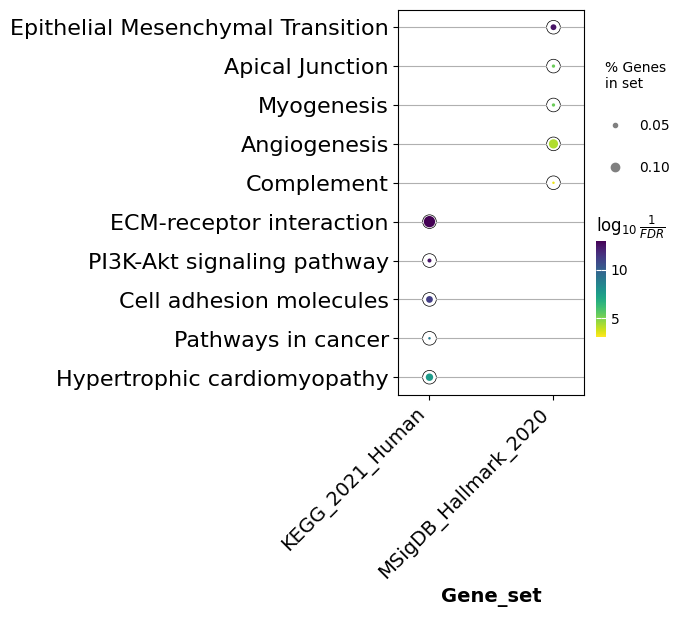

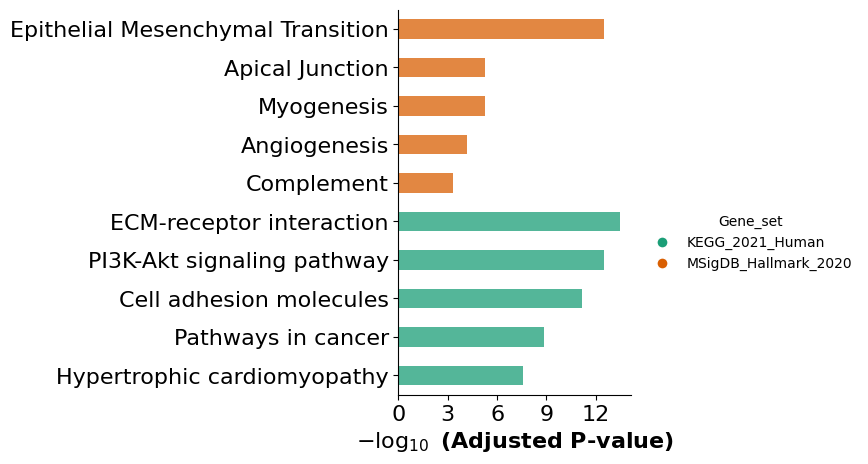

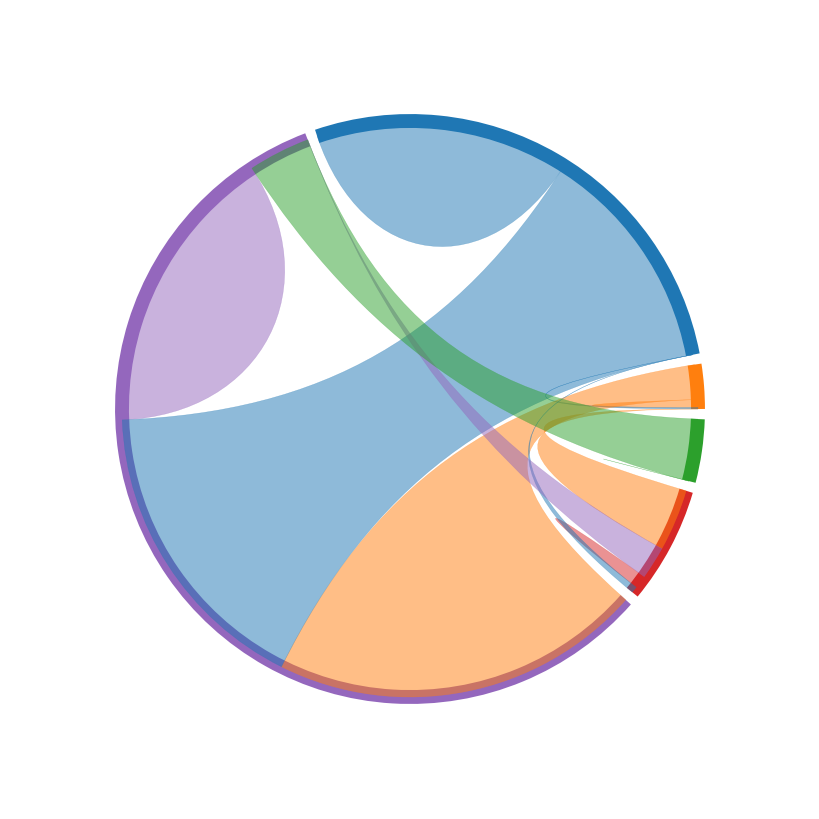


cluster5: Contains 49 LR pairs


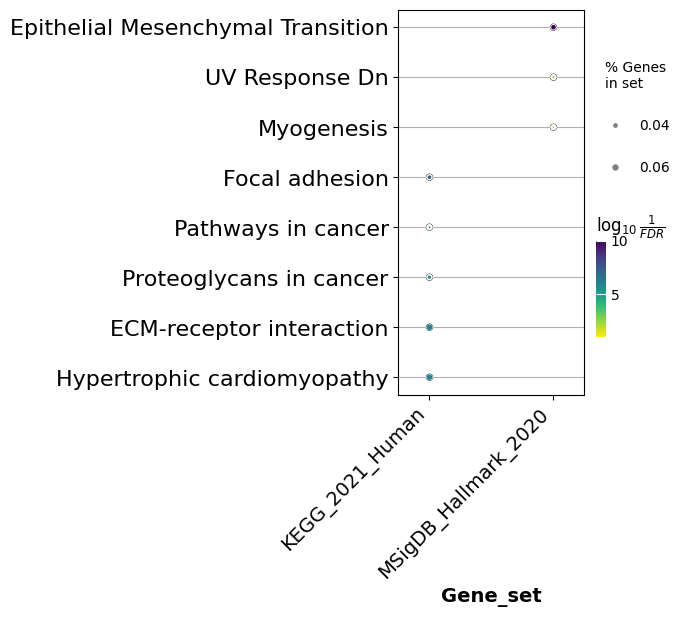

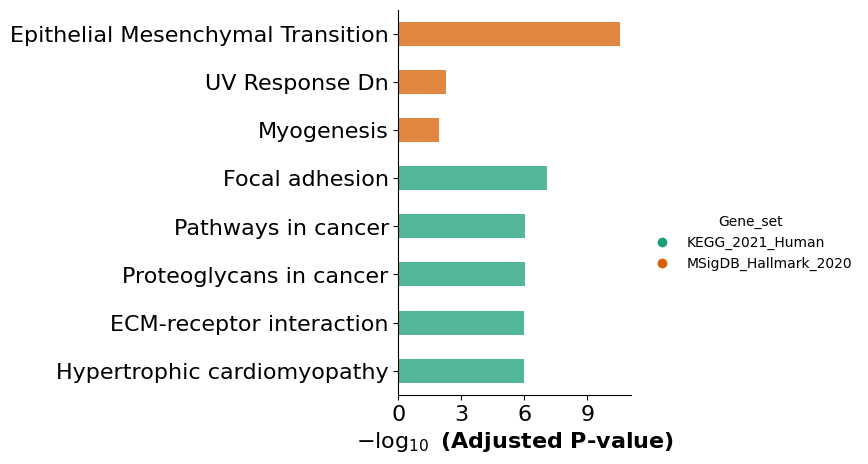

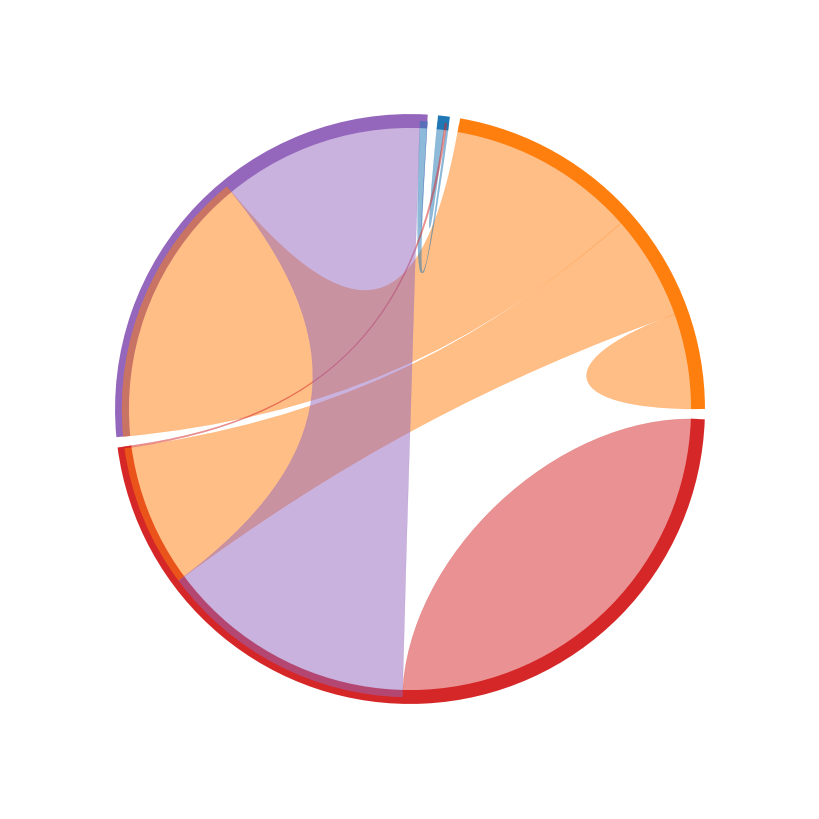


cluster6: Contains 28 LR pairs


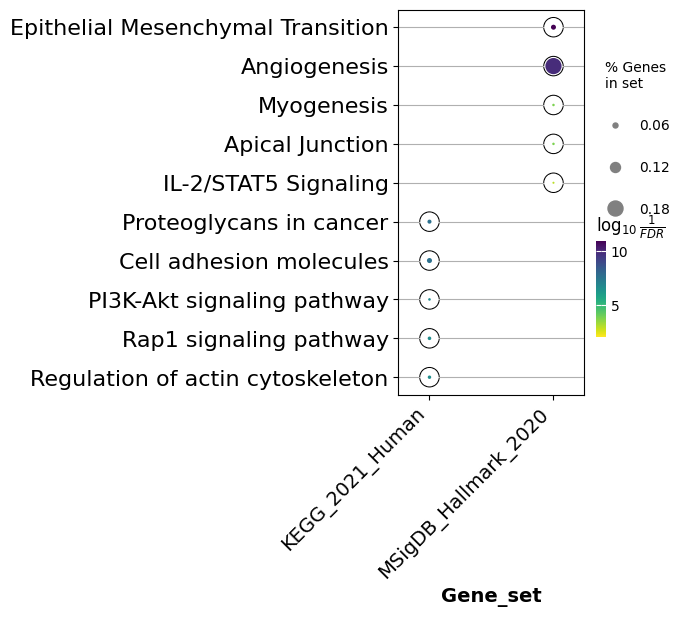

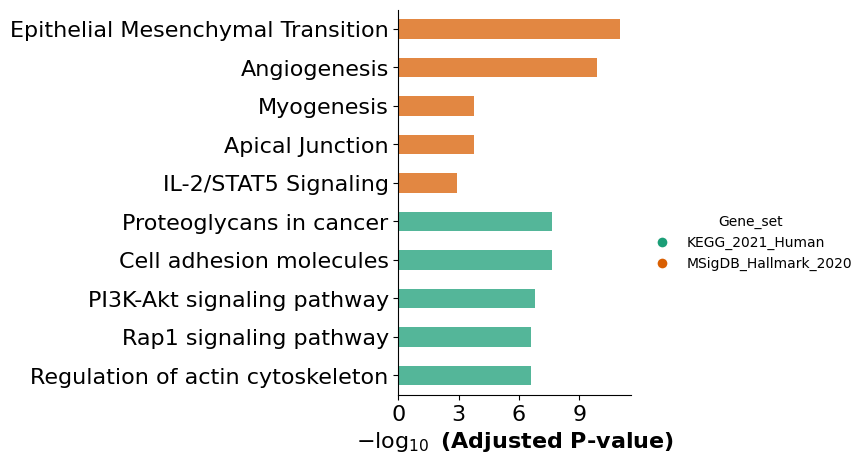

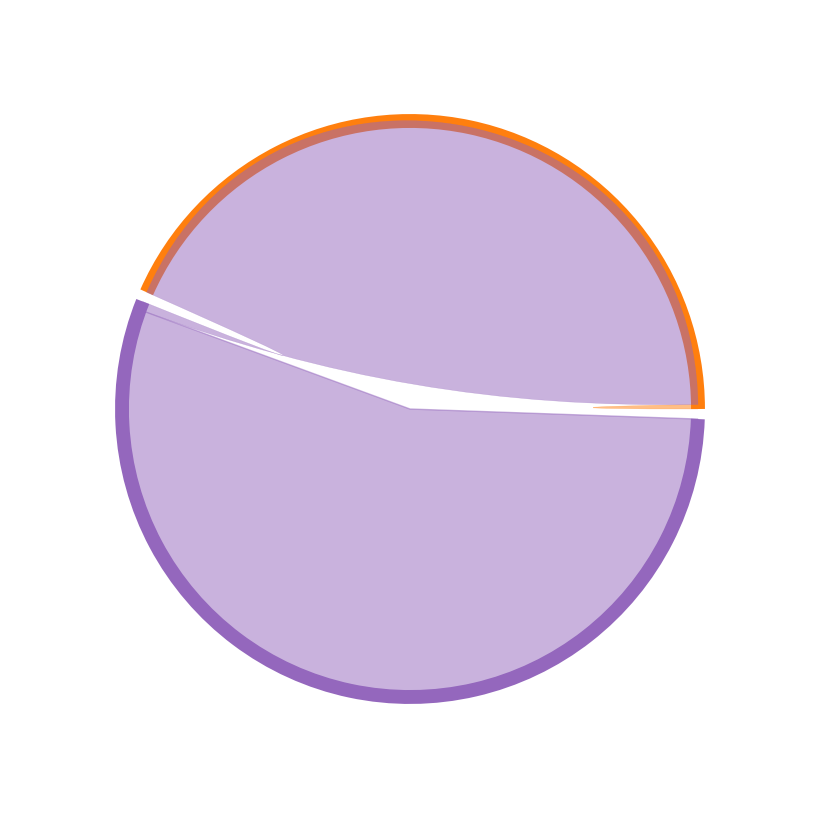


cluster7: Contains 53 LR pairs


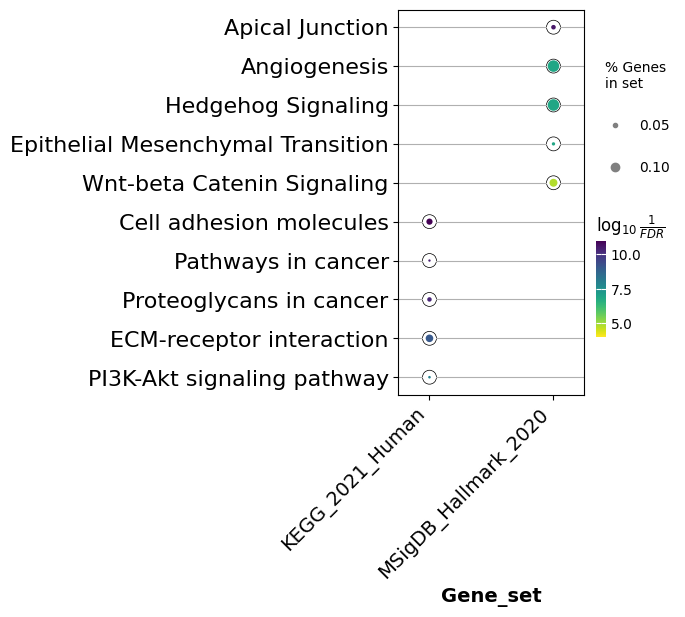

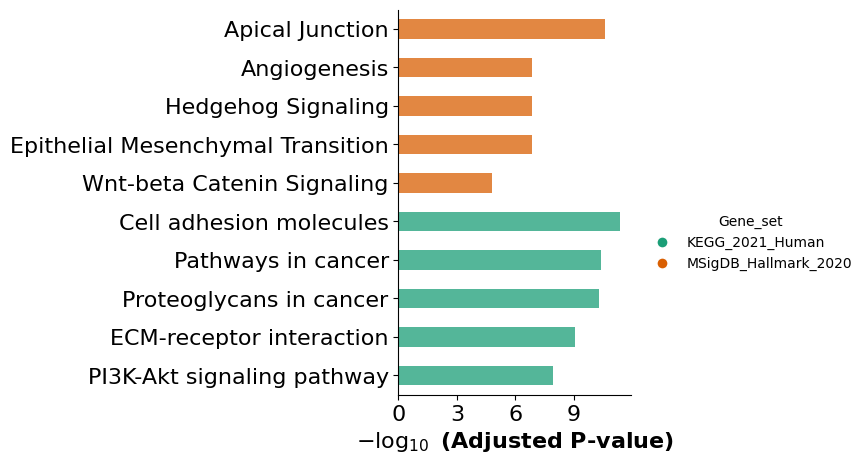

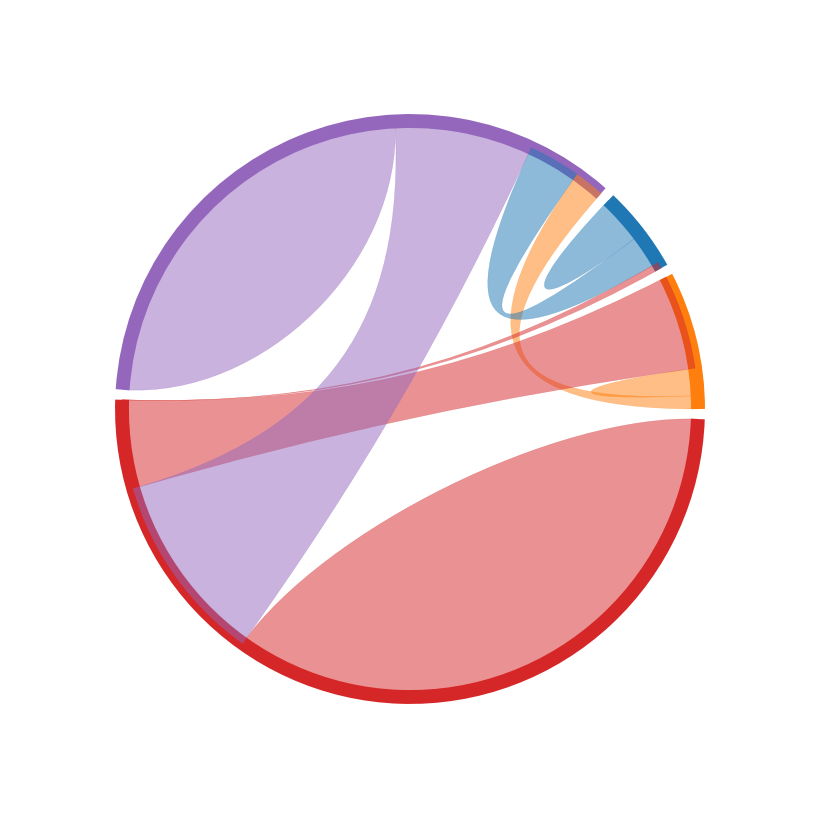


cluster8: Contains 50 LR pairs


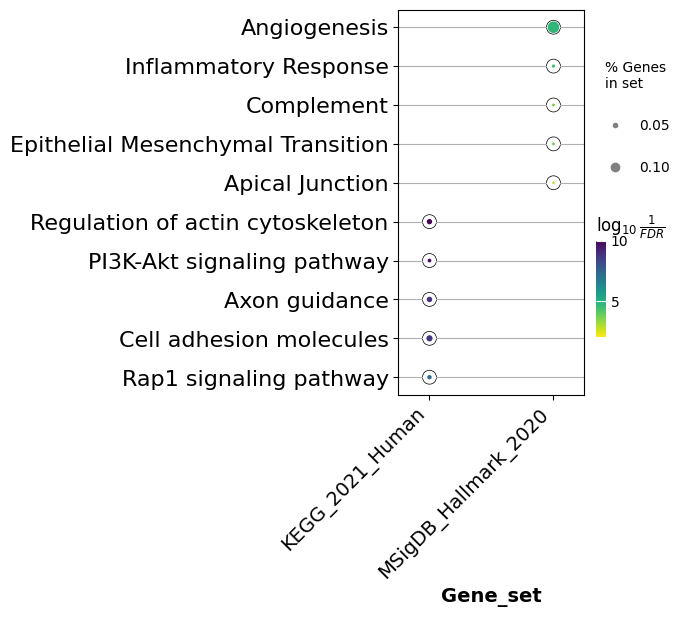

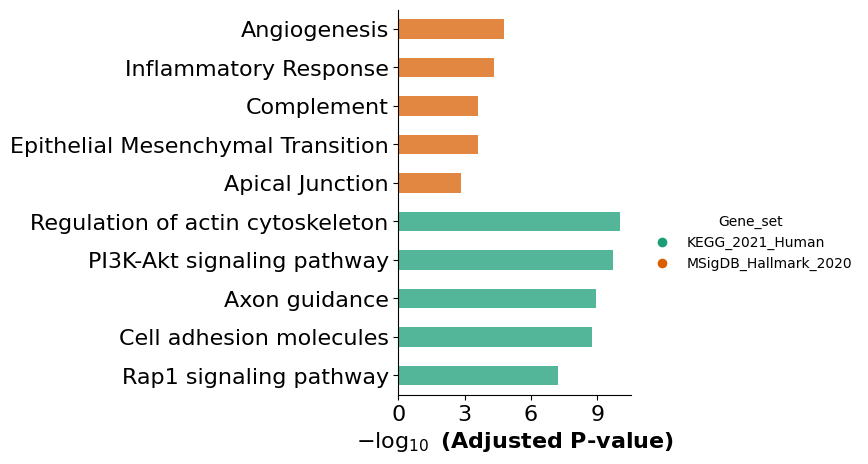

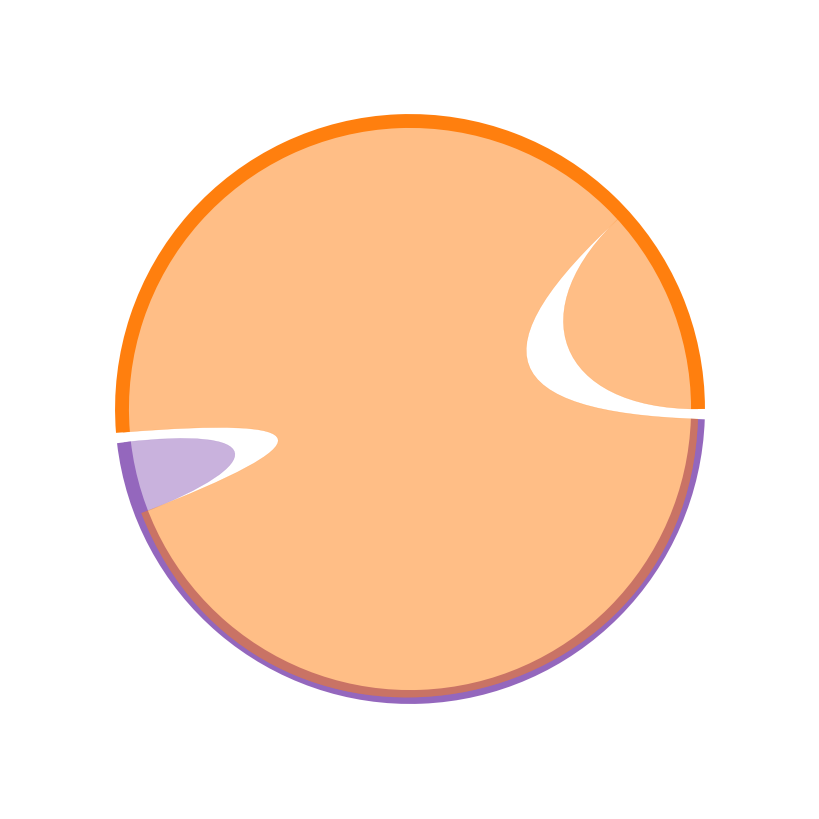


cluster9: Contains 20 LR pairs


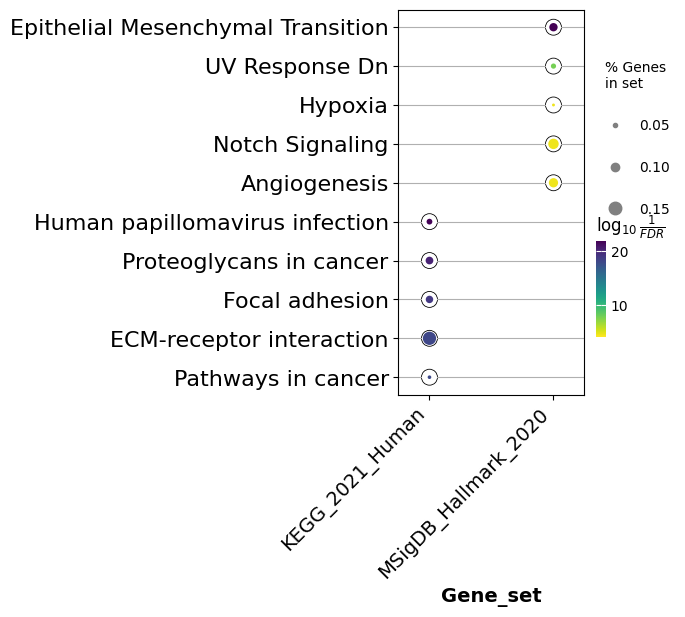

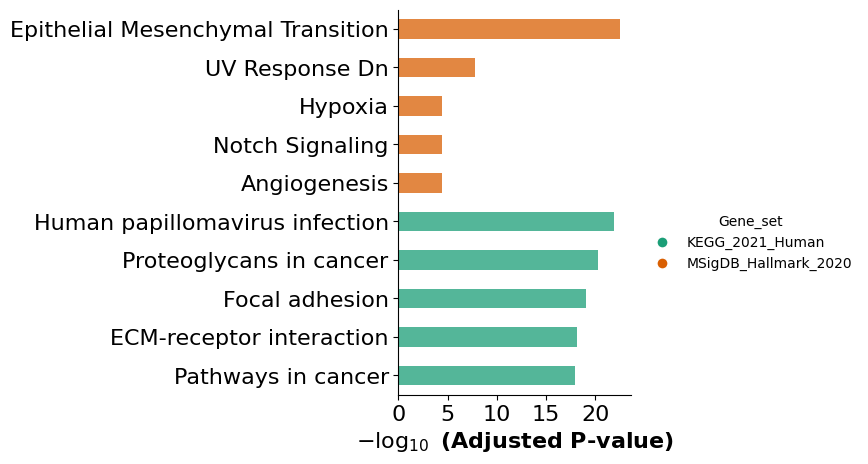

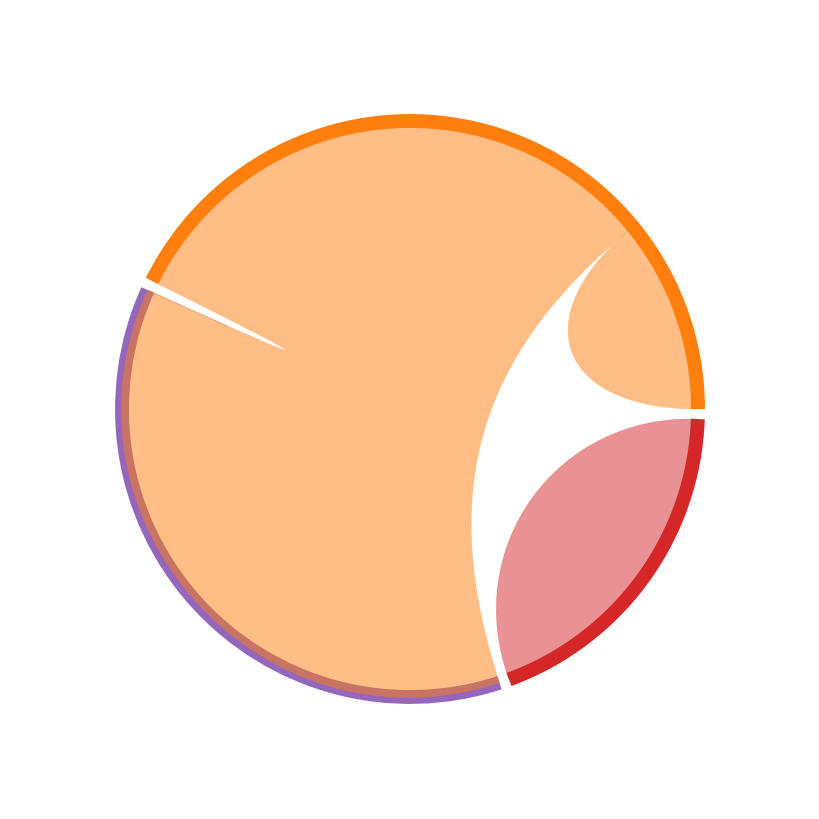


cluster10: Contains 83 LR pairs


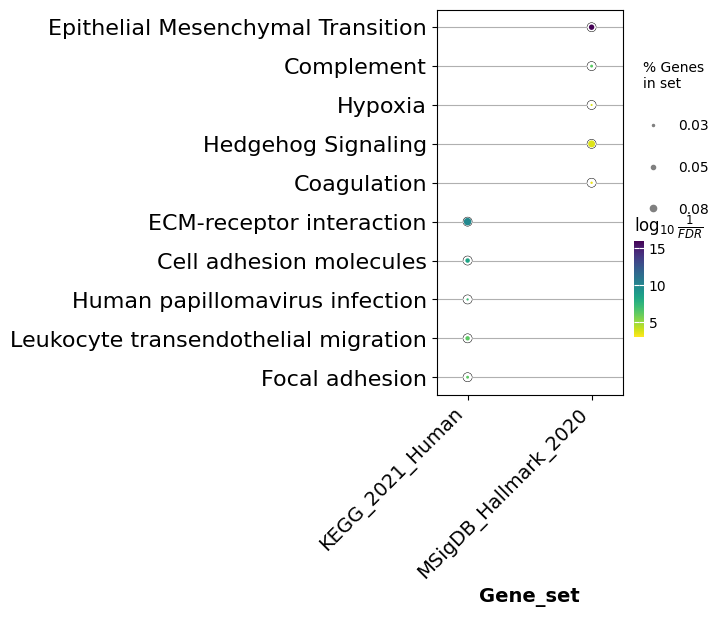

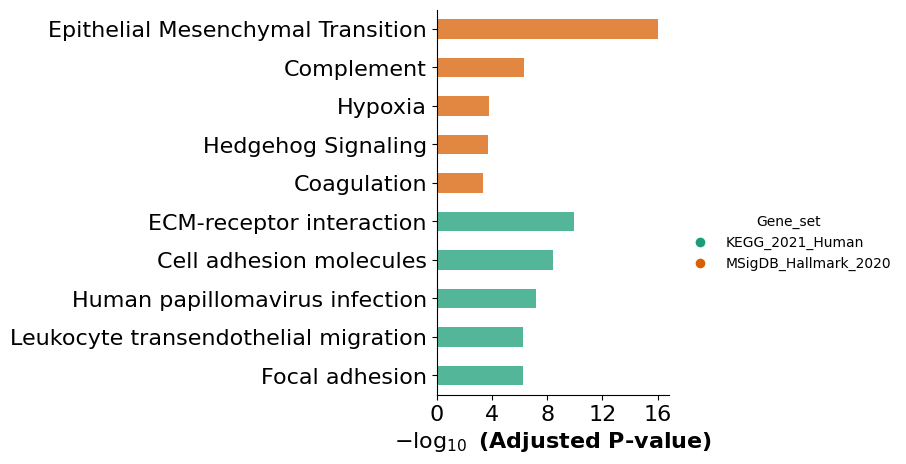

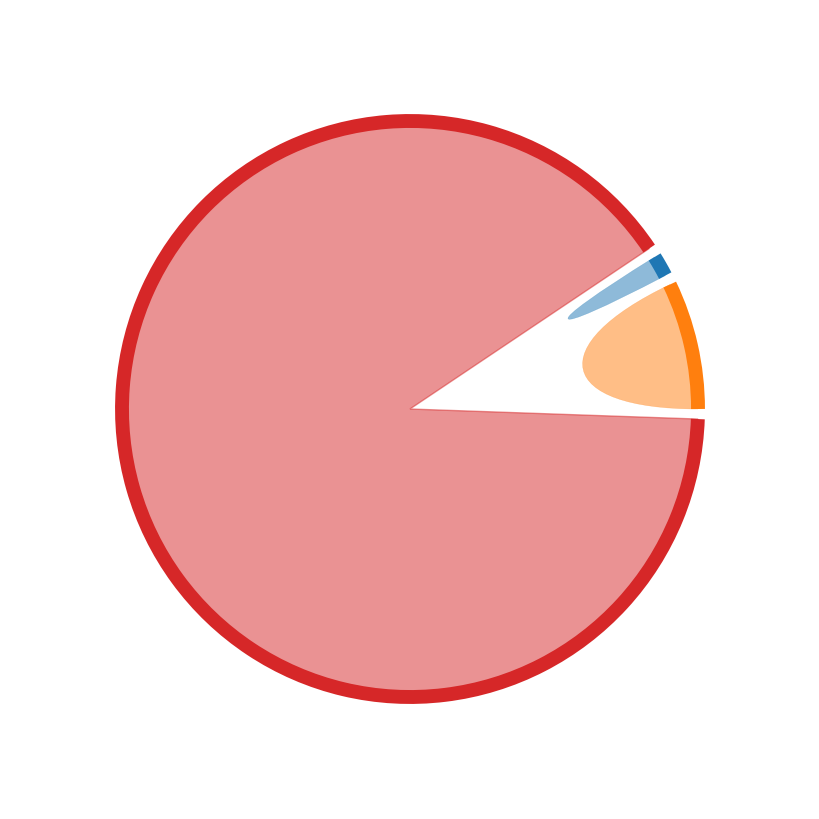


cluster11: Contains 57 LR pairs


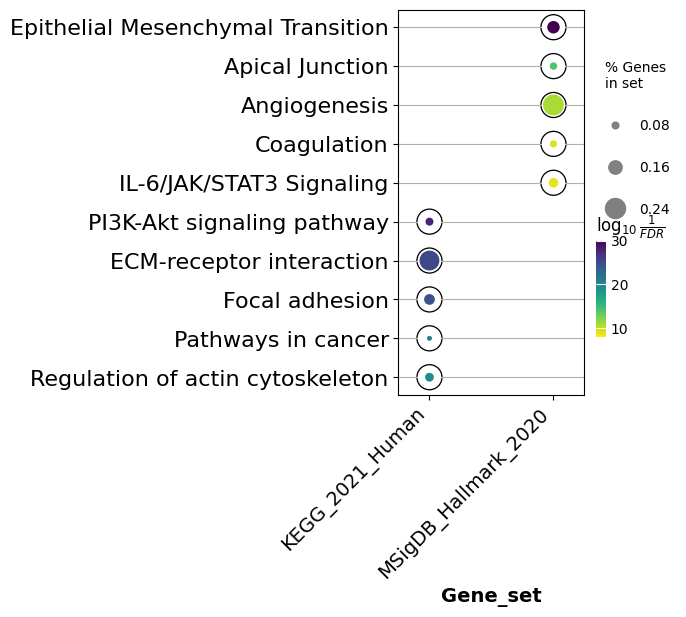

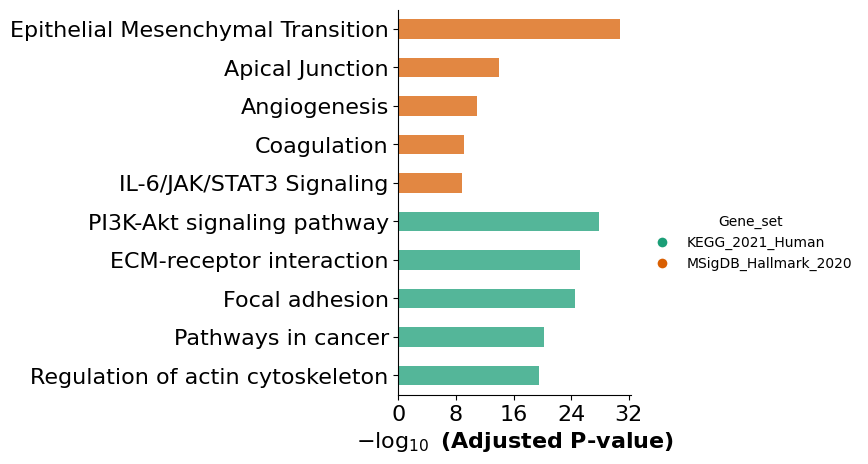

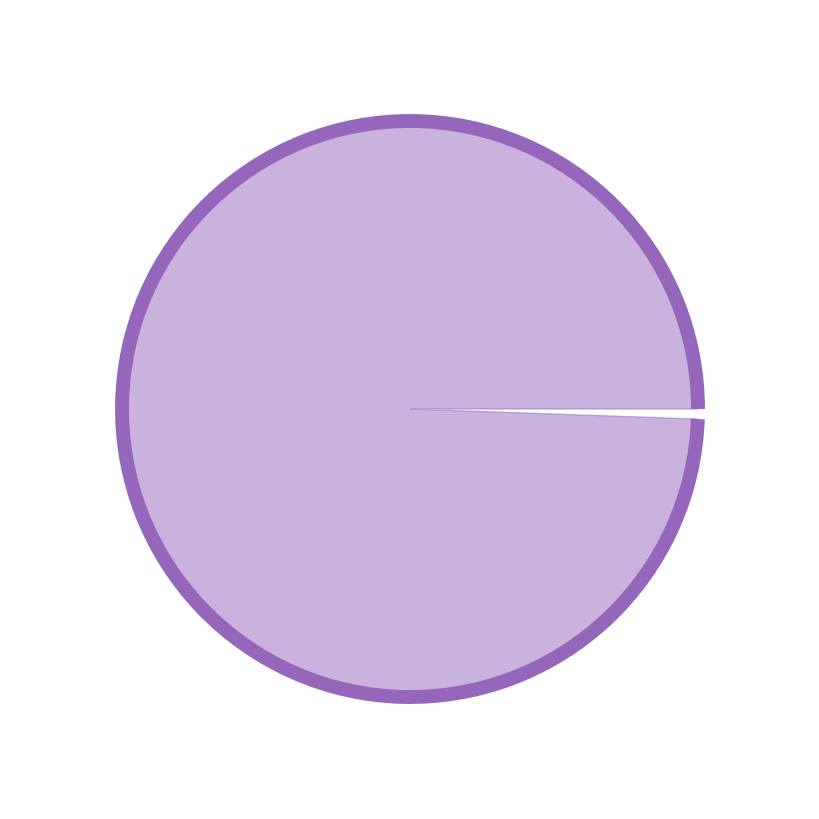


cluster12: Contains 84 LR pairs


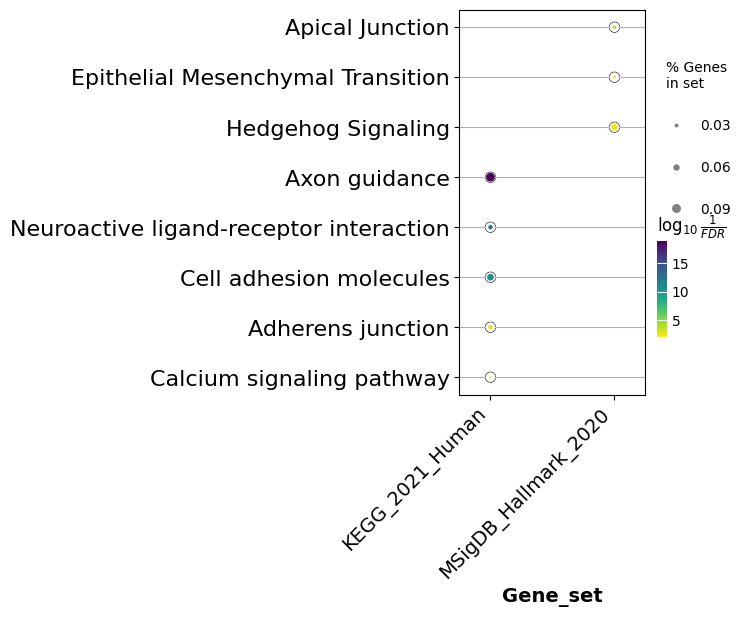

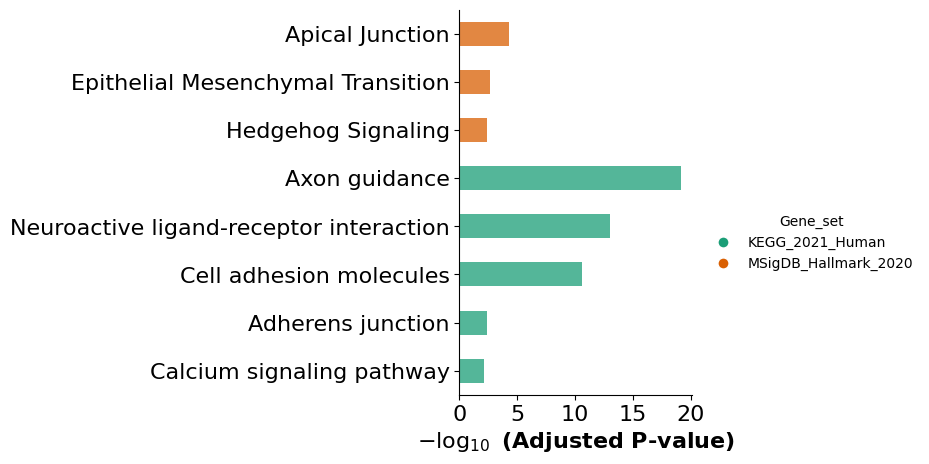

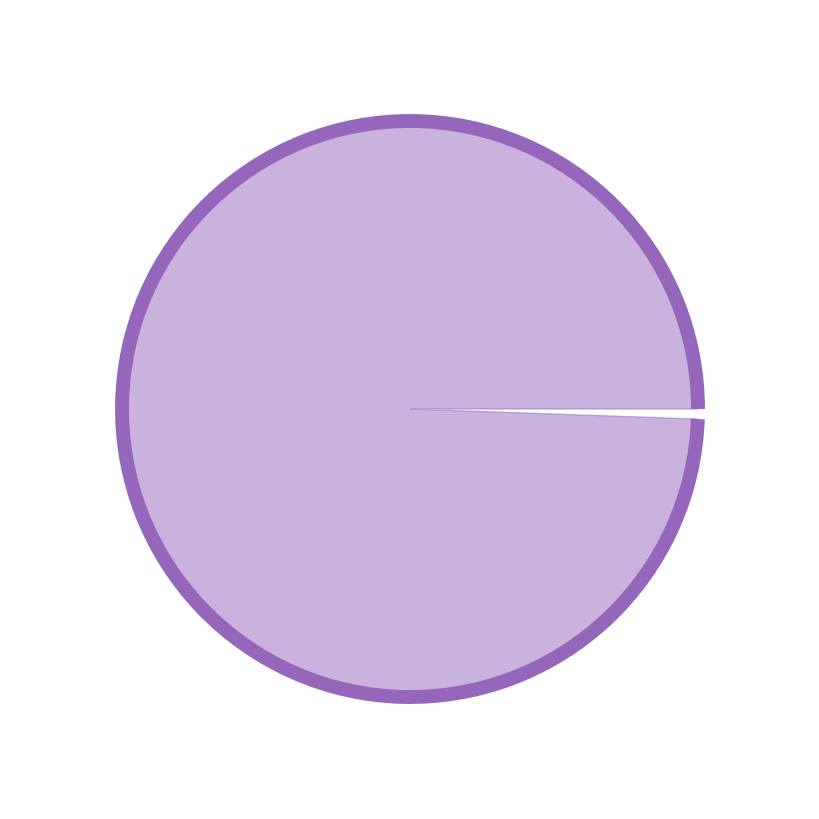


cluster13: Contains 30 LR pairs


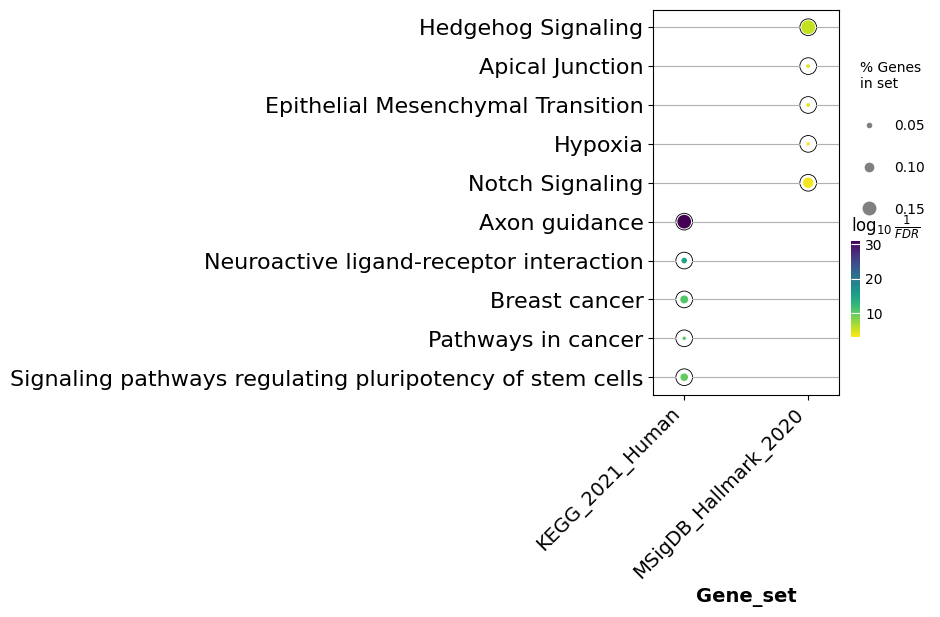

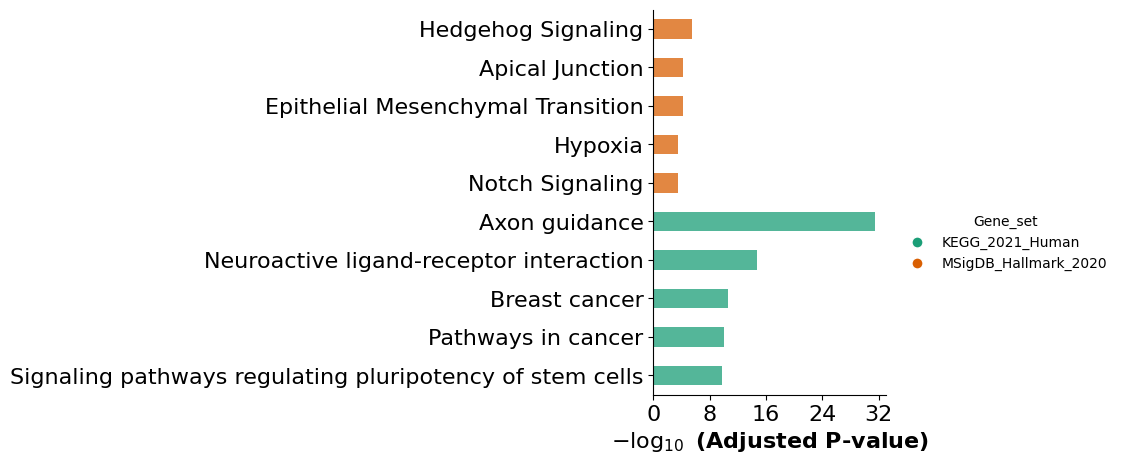

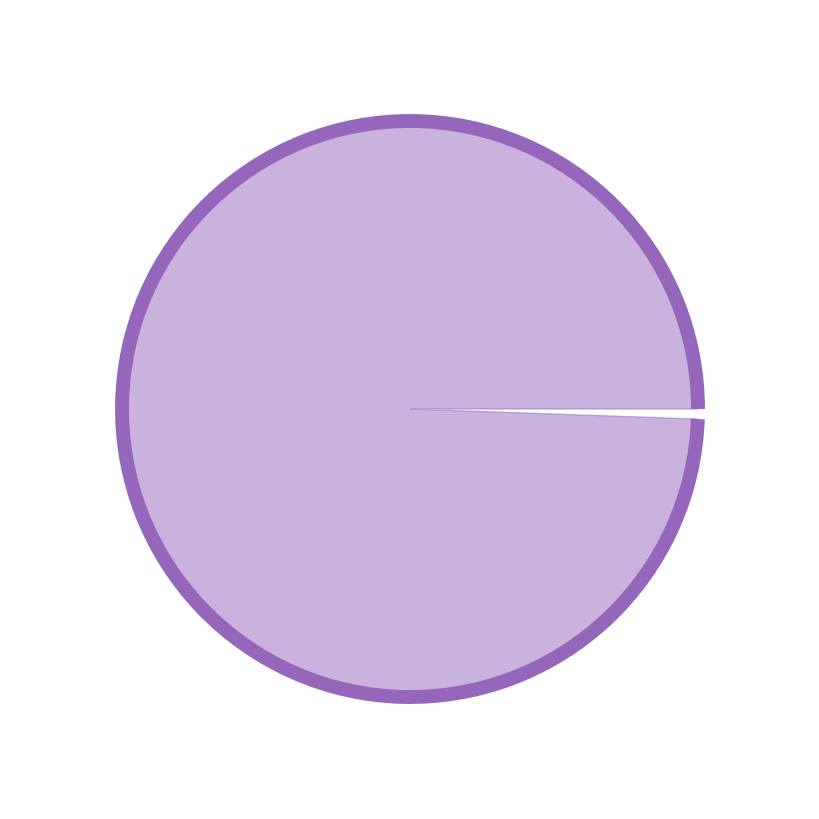

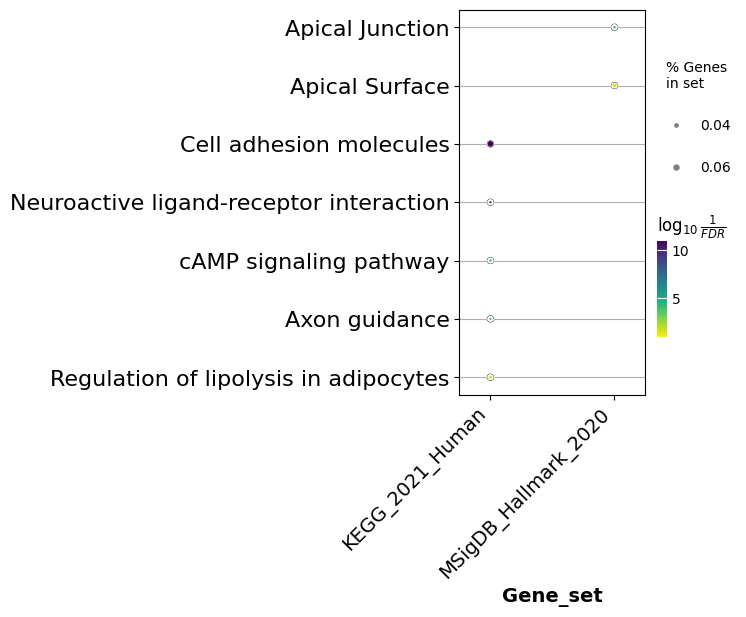

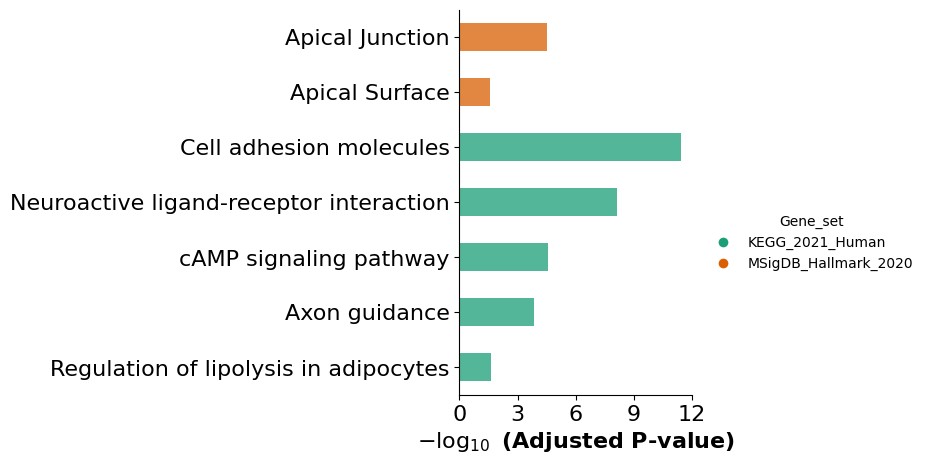

In [30]:
for cluster, matrix in aged_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(aged_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.chord_plot(matrix, colors=colors, label_size=0)
    mmcci.an.run_gsea(aged_integrated_clusters[cluster], organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 170/170 [00:08<00:00, 20.31it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 258/258 [00:21<00:00, 12.14it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...

cluster0: Contains 46 LR pairs


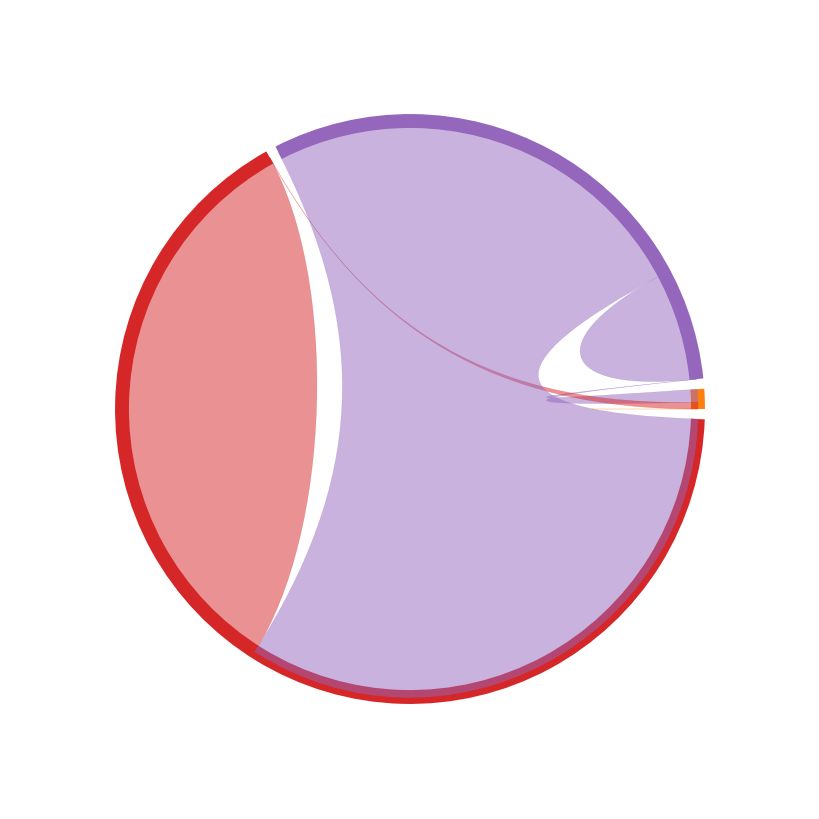


cluster1: Contains 40 LR pairs


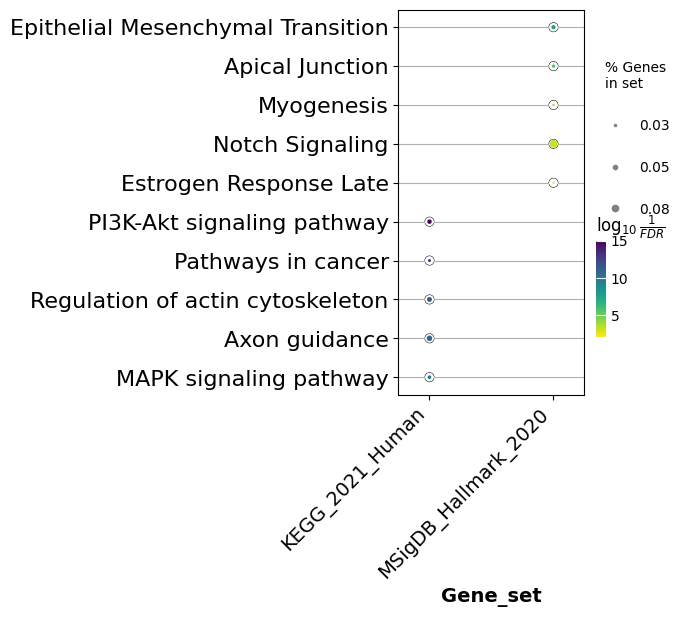

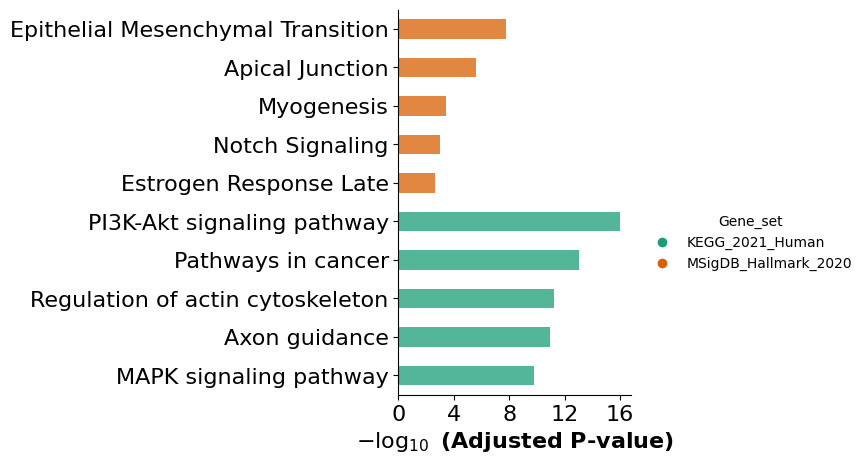

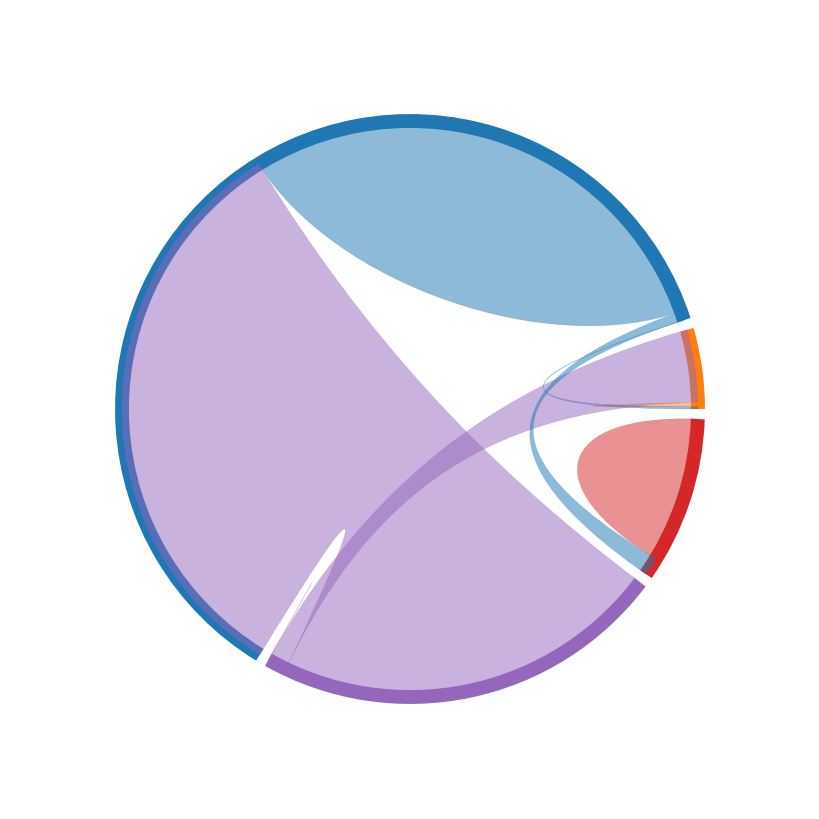


cluster2: Contains 43 LR pairs


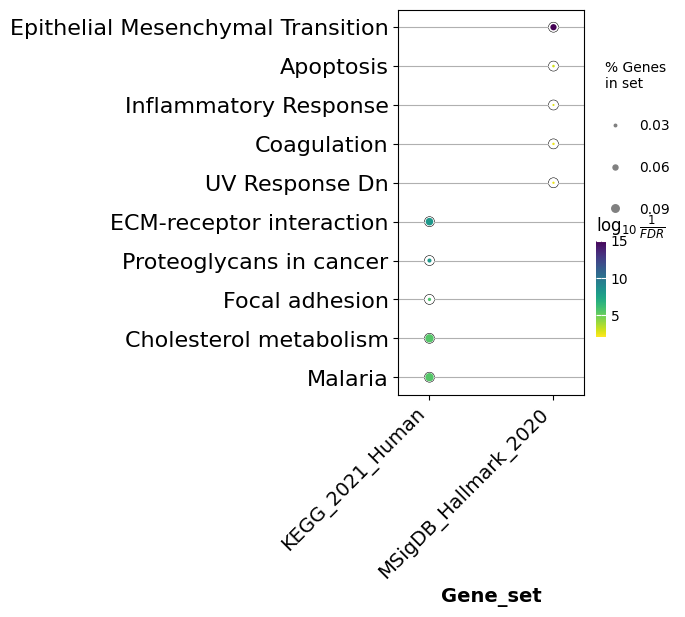

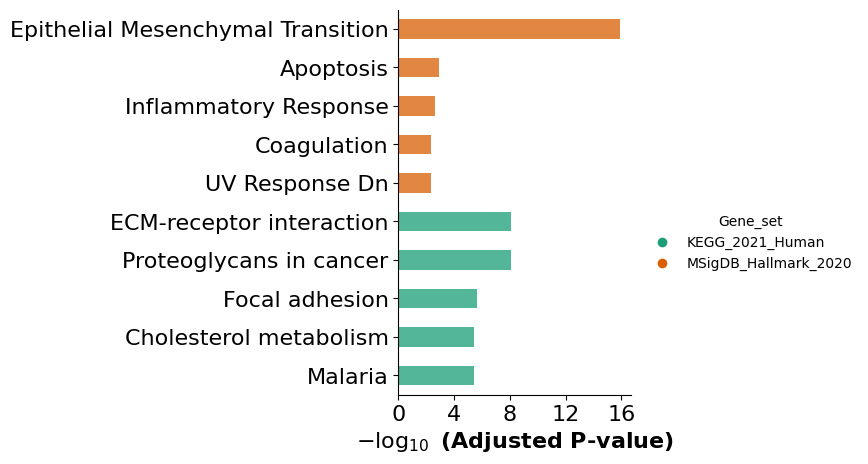

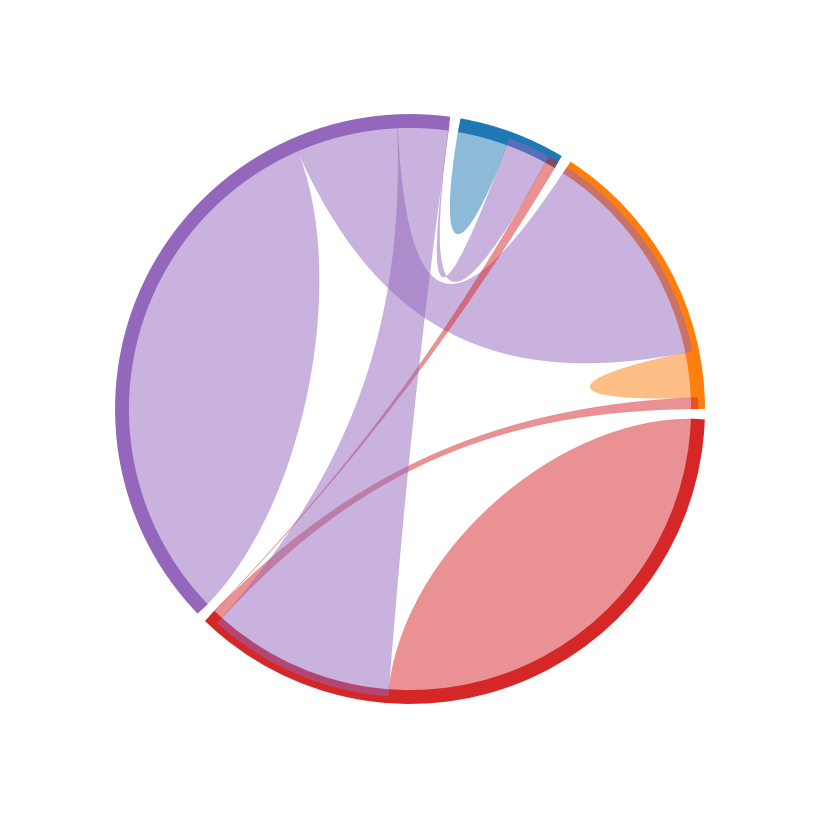


cluster3: Contains 41 LR pairs


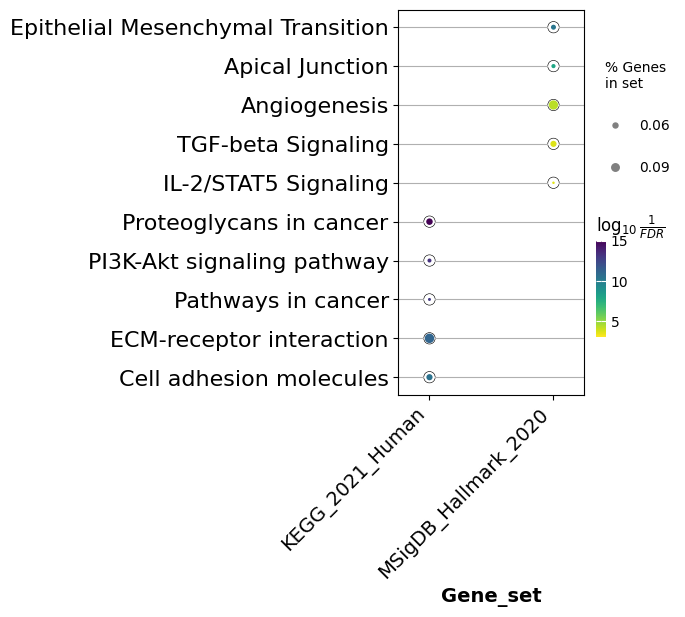

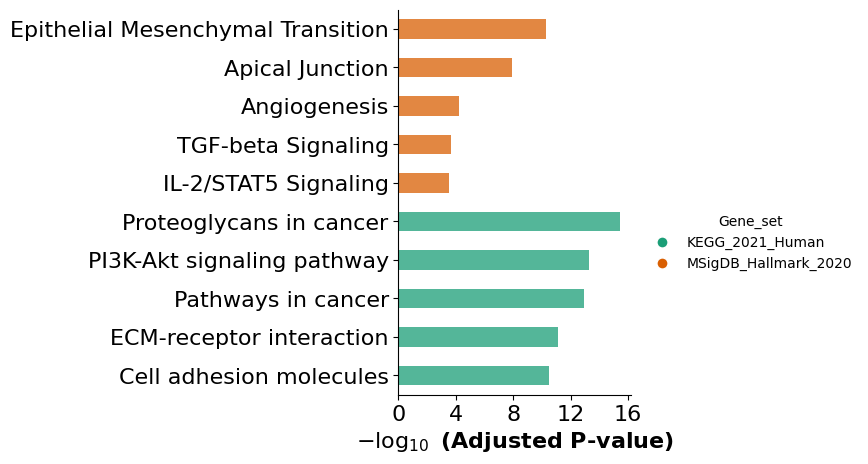

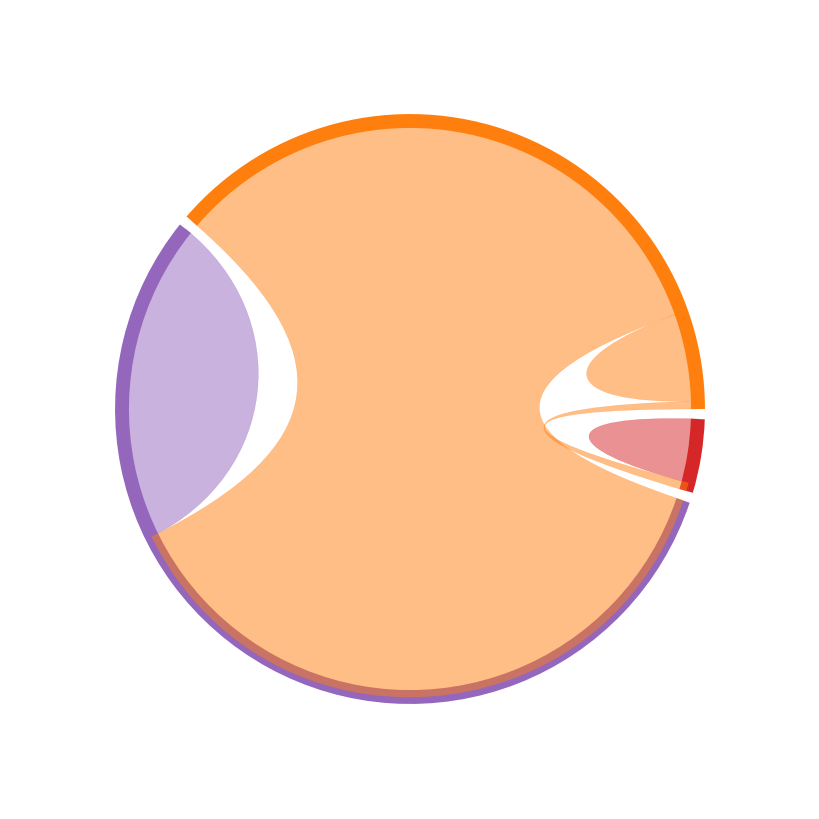


cluster4: Contains 166 LR pairs


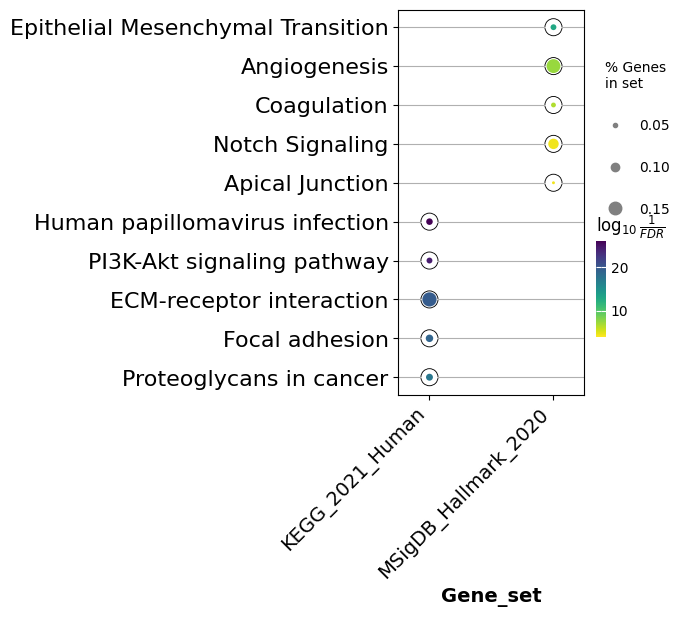

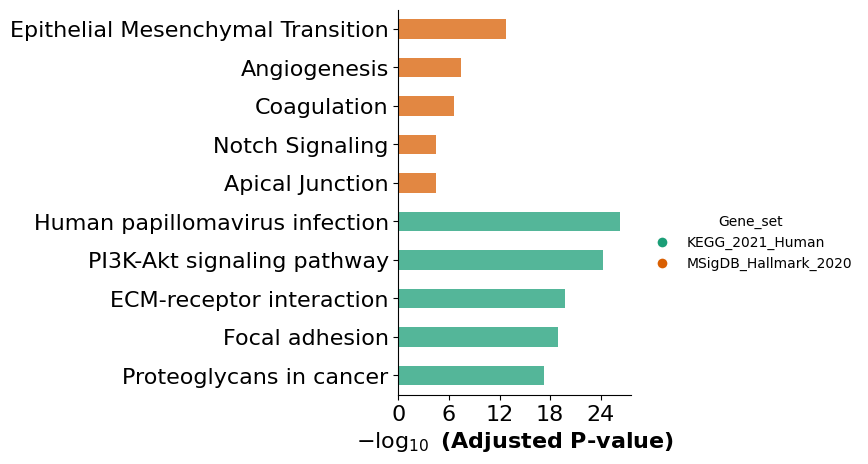

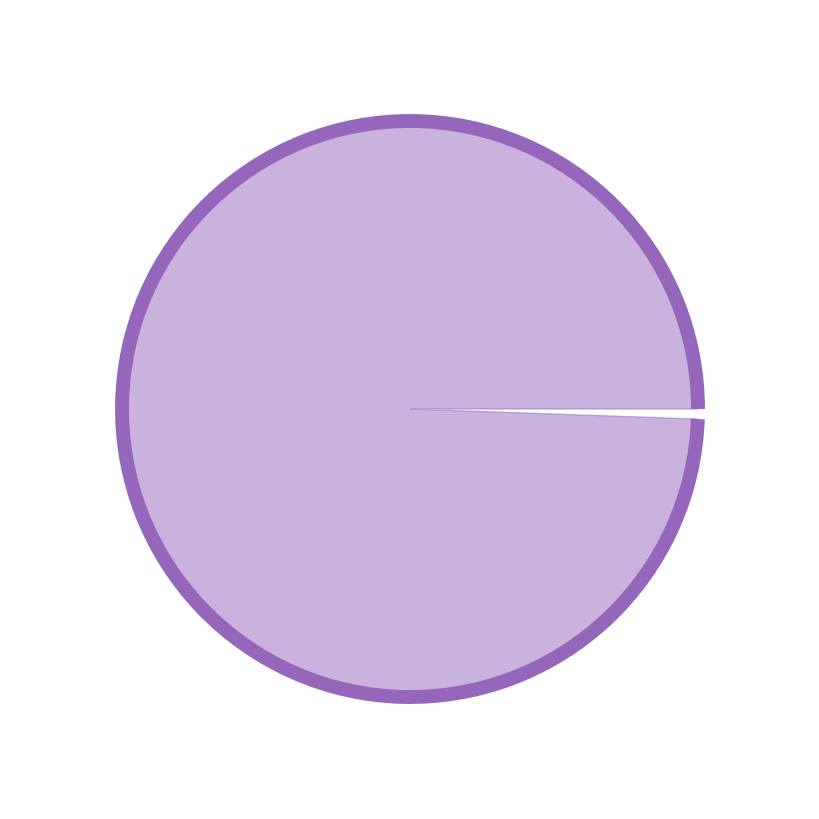


cluster5: Contains 92 LR pairs


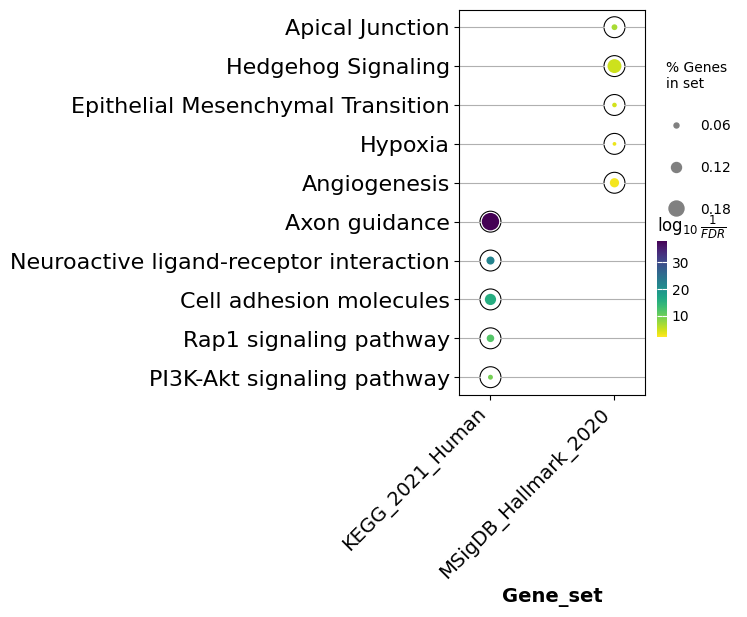

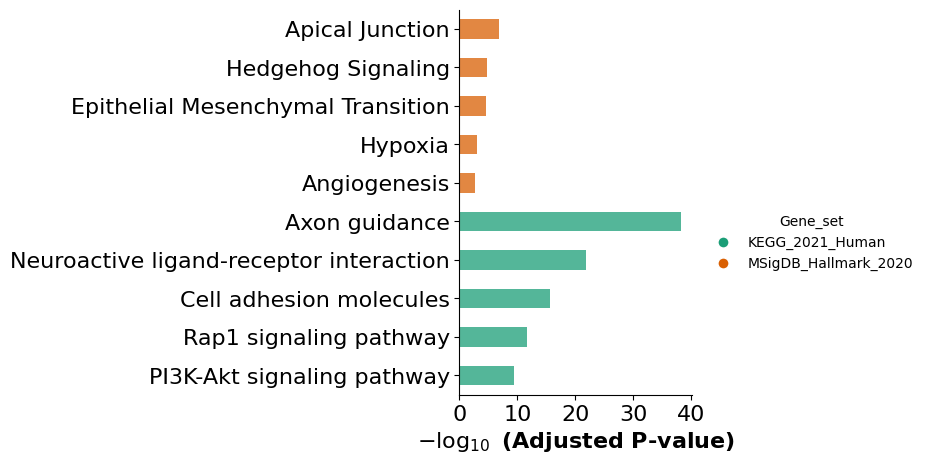

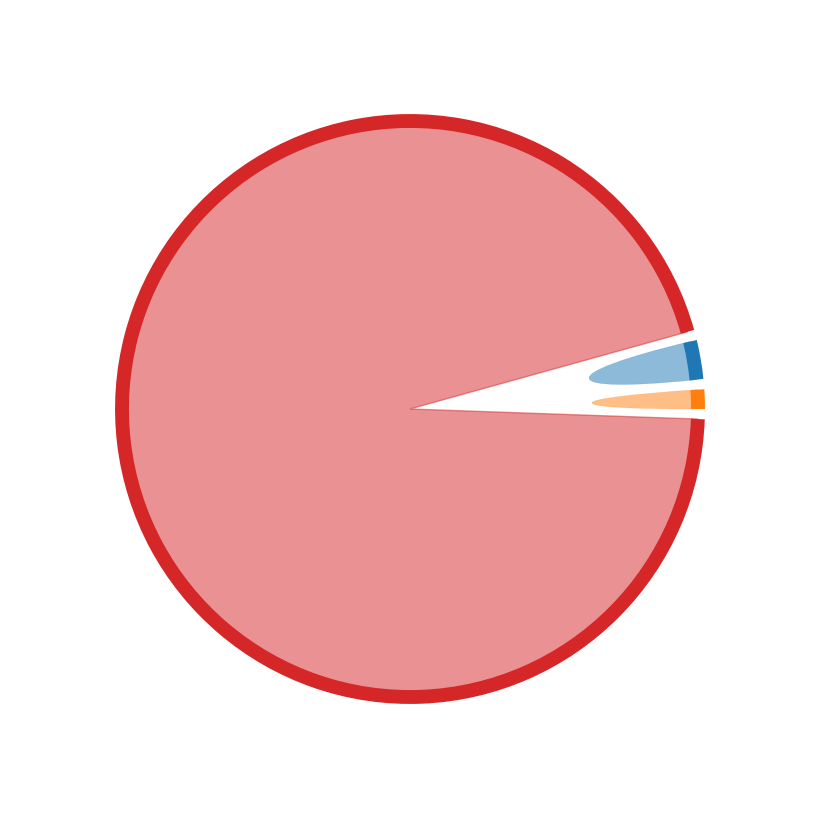

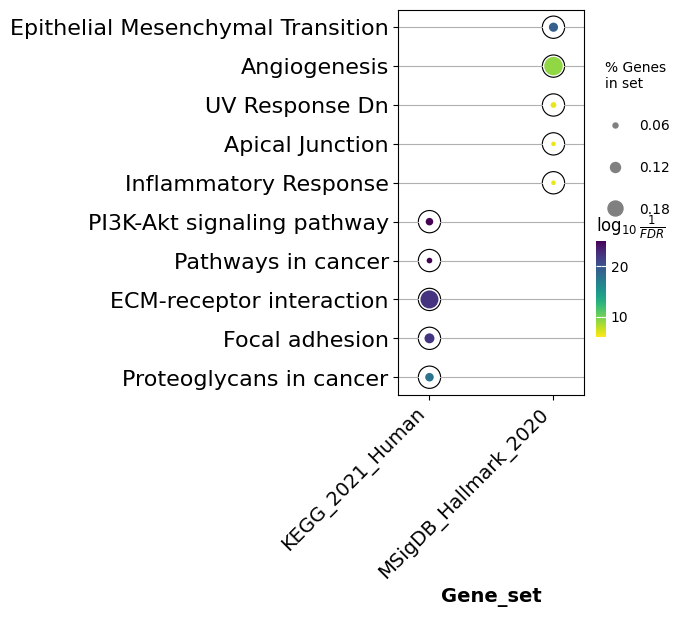

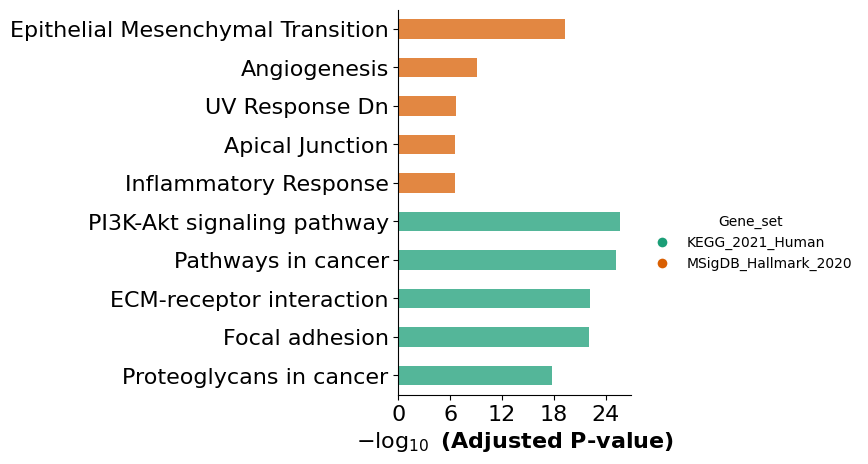

In [31]:
young_clusters = mmcci.an.lr_grouping(young_integrated_filtered, n_clusters=0)
young_integrated_clusters = mmcci.an.subset_clusters(young_integrated_filtered, young_clusters)
young_overall_clusters = mmcci.an.calculate_cluster_interactions(young_integrated_clusters)
        
for cluster, matrix in young_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(young_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.chord_plot(matrix, label_size=0, colors=colors)
    mmcci.an.run_gsea(young_integrated_clusters[cluster], organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

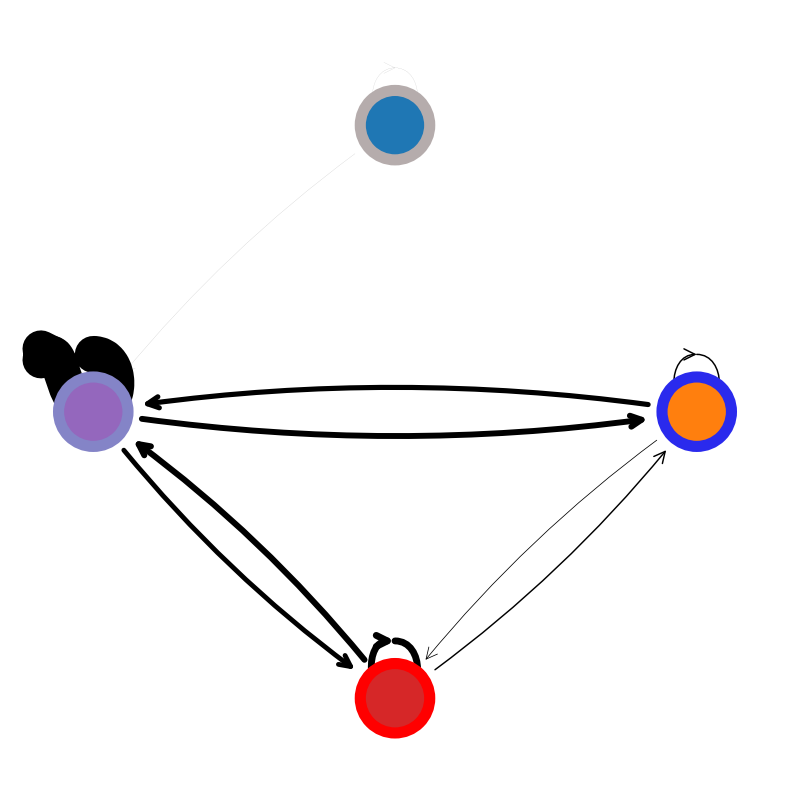

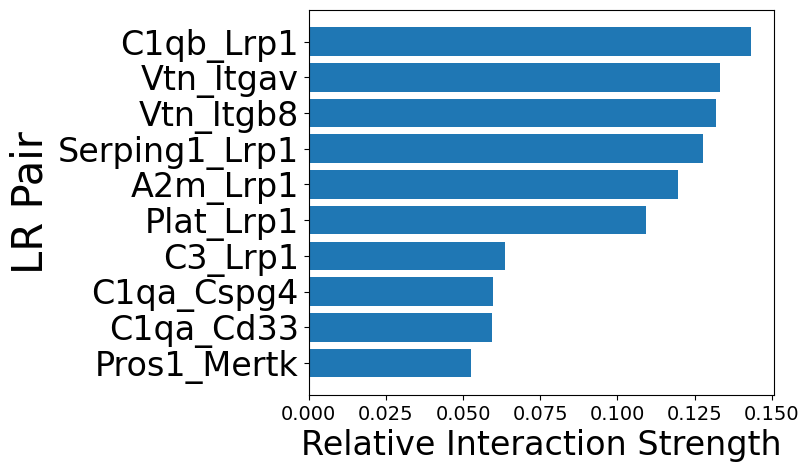

In [32]:
results = mmcci.an.run_gsea(aged_integrated, organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"], show_plots=False)
grouped = mmcci.an.pathway_subset(aged_integrated, results, ["Complement and coagulation cascades"], strict=False)
grouped_overall = mmcci.it.calculate_overall_interactions(grouped)
mmcci.plt.network_plot(grouped_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
mmcci.plt.lr_barplot(grouped, n=10, x_label_size=24, y_label_size=30, y_tick_size=24, figsize=(6,5))

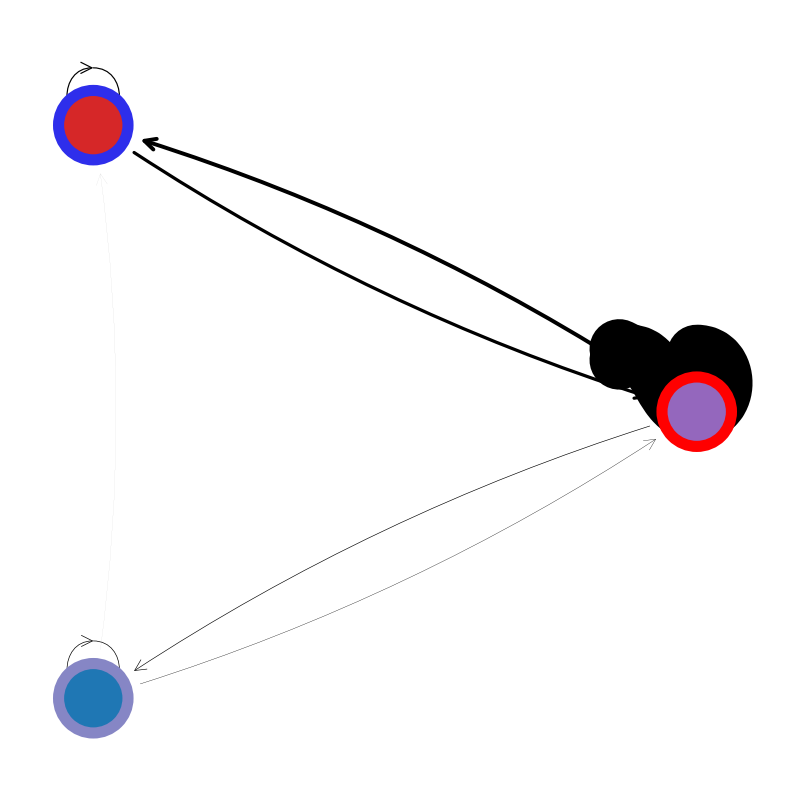

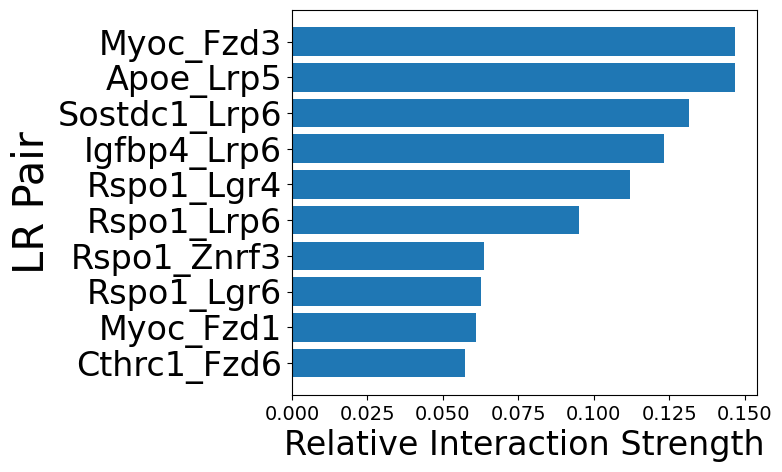

In [33]:
results = mmcci.an.run_gsea(young_integrated, organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"], show_plots=False)
grouped = mmcci.an.pathway_subset(young_integrated, results, ["Wnt signaling pathway"], strict=False)
grouped_overall = mmcci.it.calculate_overall_interactions(grouped)
grouped_overall = grouped_overall.loc[["Neurons", "Oligos", "Ependymal"],["Neurons", "Oligos", "Ependymal"]]
mmcci.plt.network_plot(grouped_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
mmcci.plt.lr_barplot(grouped, n=10, x_label_size=24, y_label_size=30, y_tick_size=24, figsize=(6,5))